# FIFA player and teams analysis

## 1. Defining the Question

### a) Specifying the Question


> We have been tasked with predicting a players average rating based on a number of variables that have been provided, we will also predict a teams average rating based on the same variables.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

> The data was extracted from the popular electronic arts game FIFA 22 a football game (to my brothere and sisters in the U.S what you call soccer).

## 2. Reading the Data

In [1]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pylab 
import squarify
import missingno
import warnings
warnings.filterwarnings('ignore' )

Our player and teams data is provided on separate sheets and we will need to merge them for us to be able to conduct analysis and predict accurately.

In [2]:
#data
play = pd.read_csv('players_fifa22.csv')
team = pd.read_csv('teams_fifa22.csv')

## 3. Checking the Data

#### 1. Players

In [3]:
# Determining the no. of records in our dataset
play.shape

(19260, 90)

In [4]:
# Previewing the top of our dataset
play.head(10)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
5,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,91,91,...,91,91,91,82,83,82,78,72,78,24
6,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,91,91,...,91,85,91,70,66,70,65,53,65,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,https://cdn.sofifa.com/players/215/914/22_60.png,France,90,90,...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,https://cdn.sofifa.com/players/202/126/22_60.png,England,90,90,...,87,85,87,70,71,70,67,64,67,23
9,192448,M. ter Stegen,Marc-André ter Stegen,29,187,85,https://cdn.sofifa.com/players/192/448/22_60.png,Germany,90,92,...,42,48,42,36,44,36,34,36,34,91


In [5]:
# Previewing the bottom of our dataset
play.tail(10)

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
19250,257934,Guo Yunqi,Yunqi Guo,24,175,66,https://cdn.sofifa.com/players/257/934/22_60.png,China PR,48,53,...,50,50,50,50,50,50,50,49,50,17
19251,261976,Lu Xianyong,Xianyong Lu,21,169,62,https://cdn.sofifa.com/players/261/976/22_60.png,China PR,48,55,...,52,50,52,47,47,47,47,43,47,15
19252,257930,P. Kyum,Parmanjan Kyum,20,172,65,https://cdn.sofifa.com/players/257/930/22_60.png,China PR,48,53,...,45,42,45,35,32,35,34,31,34,17
19253,260474,Kim Bong Soo,Bong Soo Kim,21,183,78,https://cdn.sofifa.com/players/260/474/22_60.png,Korea Republic,48,57,...,49,50,49,50,52,50,50,51,50,19
19254,255336,F. Emmings,Fred Emmings,17,195,95,https://cdn.sofifa.com/players/255/336/22_60.png,United States,48,73,...,20,22,20,19,23,19,18,22,18,49
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17
19259,261932,Chen Guoliang,Guoliang Chen,22,186,70,https://cdn.sofifa.com/players/261/932/22_60.png,China PR,48,53,...,35,35,35,46,44,46,48,50,48,16


In [6]:
# Checking whether each column has an appropriate datatype
play.dtypes

ID            int64
Name         object
FullName     object
Age           int64
Height        int64
              ...  
RWBRating     int64
LBRating      int64
CBRating      int64
RBRating      int64
GKRating      int64
Length: 90, dtype: object

In [7]:
#checking the of columns 
play.columns 

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [8]:
#getting general information about our dataset
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

#### 2. Team

In [9]:
# Determining the no. of records in our dataset
team.shape

(734, 14)

In [10]:
# Previewing the top of our dataset
team.head(10)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25.1,23.2
1,2,Aston Villa,English Premier League (1),13,78,79,76,77,37500000,4,3,31,24.7,23.3
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,24.7,23.4
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,26.9,23.5
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,28.6,26.6
5,5,Chelsea,English Premier League (1),13,83,84,85,82,85000000,8,8,33,27.8,24.8
6,1799,Crystal Palace,English Premier League (1),13,76,77,76,74,30000000,3,2,33,27.6,25.3
7,7,Everton,English Premier League (1),13,79,79,78,80,49000000,6,5,33,27.3,25.7
8,8,Leeds United,English Premier League (1),13,76,78,78,76,32500000,5,2,31,26.4,22.7
9,95,Leicester City,English Premier League (1),13,80,82,81,79,50000000,7,6,33,27.4,25.3


In [11]:
# Previewing the bottom of our dataset
team.tail(10)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
724,101110,Club Atlético Peñarol,Uruguayan Primera División (1),338,69,67,70,65,4900000,8,6,26,27.1,25.4
725,115535,Club Atlético Rentistas,Uruguayan Primera División (1),338,65,64,65,64,500000,5,1,27,25.6,24.4
726,111325,Club Nacional de Football,Uruguayan Primera División (1),338,70,74,70,68,5400000,9,6,22,26.9,26.4
727,113143,Montevideo City Torque,Uruguayan Primera División (1),338,65,64,64,66,2700000,5,2,20,25.4,24.4
728,110992,AC Mineros de Guayana,Venezuelan Primera División (1),2019,61,58,61,61,1300000,5,3,24,26.1,23.1
729,114611,Academia Puerto Cabello,Venezuelan Primera División (1),2019,63,64,63,62,1500000,1,1,27,27.4,24.5
730,112916,Aragua Fútbol Club,Venezuelan Primera División (1),2019,63,63,62,61,1400000,3,3,28,27.4,25.5
731,112853,Deportivo La Guaira FC,Venezuelan Primera División (1),2019,66,65,66,65,1200000,4,1,28,26.6,25.6
732,110990,Deportivo Táchira FC,Venezuelan Primera División (1),2019,63,65,63,63,1900000,6,4,27,27.7,26.1
733,112914,Metropolitanos de Caracas FC,Venezuelan Primera División (1),2019,66,68,65,63,1500000,1,1,27,26.4,25.0


In [12]:
# Checking whether each column has an appropriate datatype
team.dtypes

ID                      int64
Name                   object
League                 object
LeagueId                int64
Overall                 int64
Attack                  int64
Midfield                int64
Defence                 int64
TransferBudget          int64
DomesticPrestige        int64
IntPrestige             int64
Players                 int64
StartingAverageAge    float64
AllTeamAverageAge     float64
dtype: object

In [13]:
#getting the general information of our data
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  734 non-null    int64  
 1   Name                734 non-null    object 
 2   League              734 non-null    object 
 3   LeagueId            734 non-null    int64  
 4   Overall             734 non-null    int64  
 5   Attack              734 non-null    int64  
 6   Midfield            734 non-null    int64  
 7   Defence             734 non-null    int64  
 8   TransferBudget      734 non-null    int64  
 9   DomesticPrestige    734 non-null    int64  
 10  IntPrestige         734 non-null    int64  
 11  Players             734 non-null    int64  
 12  StartingAverageAge  734 non-null    float64
 13  AllTeamAverageAge   734 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 80.4+ KB


## 4. External Data Source Validation

> For us to be sure that our dataset is valid and the results that we will be producing are valid we need to ensure that teh data we have can is valid we will be verifying our data against the international governering body of football, futsal and beach football (FIFA). 

> We can verify the data from the link here .[https://www.fifa.com/search-results?q=data]

> We will also verify the data from electronic arts FIFa game here .[https://www.ea.com/games/fifa/fifa-22]

### Setting the defaults

We will be setting the defaults for ouyr charts such as the fonts our charts will use and the colors.

In [14]:
#setting colors for our plots
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
#setting the font, figsize and font size globally
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'font.size':15})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['figure.figsize'] = [10, 5]

In [15]:
#creating a function to calculate kurtosis and skewness of the data
def skew (column):
    from scipy import stats
    y = stats.skew(column).round(3)
    mean = column.mean().round(3)
    mode = column.mode().round(3)
    print('Skewness: ' + str(y))
    if y > 0:
        print('\nThe tail on the right side is greater than that on the left side the mean is greater than the mode: ')
    else:
        print('\nThe tail on the left side is greater than that on the right side the mode is greater than the mean: ')
    #checking on the Kurtosis 
    x = stats.kurtosis(column).round(3)
    print('\n Kurtosis: ' + str(x))
    if x == 0:
        print('\nThe data displays a normal distribution the data is mesokurtic.')
    elif x > 0:
        print('\nThe data is heavy tailed and has high degree of peakedness the data is leptokurtic.')
    else:
        print ('\nThe data is light tailed, hence it has a low degree of peakedness the data is platykurtic.') 

## 5. Tidying the Dataset

#### Players data

In [16]:
#checking for missing values
play.isna().any() == True

ID           False
Name         False
FullName     False
Age          False
Height       False
             ...  
RWBRating    False
LBRating     False
CBRating     False
RBRating     False
GKRating     False
Length: 90, dtype: bool

In [17]:
#selecting columns with atleast one missing values
p_alt = play.columns[play.isnull().sum() > 1]
p_alt1 = play[p_alt]
play1 = play.drop(columns = p_alt)
#adding the player id to the data 
p_alt2 = pd.concat([p_alt1, play[['ID']]], axis = 1)

# checcking the missing values
p_alt2.isnull().sum()

ClubPosition           76
ContractUntil          76
ClubNumber             76
NationalPosition    18503
NationalNumber      18503
ID                      0
dtype: int64

dropping the national position and national number because they contain more than 95% missing values

In [18]:
p_alt3 = p_alt2.drop(columns = ['NationalPosition', 'NationalNumber'])
p_alt3.head(5)

,ClubPosition,ContractUntil,ClubNumber,ID
0,RW,2023.0,30.0,158023
1,ST,2023.0,9.0,188545
2,ST,2023.0,7.0,20801
3,ST,2022.0,7.0,231747
4,GK,2023.0,13.0,200389


In [19]:
#filetring out the nan rows
nan_row = p_alt3[p_alt3['ClubPosition'].isna()]
nan_row.head(15)

,ClubPosition,ContractUntil,ClubNumber,ID
159,NaN,NaN,NaN,184087
480,NaN,NaN,NaN,197242
701,NaN,NaN,NaN,187607
1005,NaN,NaN,NaN,200094
1128,NaN,NaN,NaN,207554
1224,NaN,NaN,NaN,205211
1248,NaN,NaN,NaN,154950
1254,NaN,NaN,NaN,167575
1355,NaN,NaN,NaN,189060
2074,NaN,NaN,NaN,219409


In [20]:
#dropping the rows 
p_alt4 = p_alt3.dropna()
p_alt4.isnull().sum()

ClubPosition     0
ContractUntil    0
ClubNumber       0
ID               0
dtype: int64

In [21]:
play1

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


In [22]:
#filtering our joins to remain with rows that match the ID column only
play2 = play1[play1.ID.isin(p_alt4.ID)]
play2

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19256,250978,Ma Zhen,Zhen Ma,23,196,85,https://cdn.sofifa.com/players/250/978/22_60.png,China PR,48,52,...,26,23,26,26,23,26,26,26,26,49
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


We will drop the photourl since it contains a link to the players mugshots this is unique for every player hence we will drop it.

In [23]:
play3 = play2.drop(columns = ['PhotoUrl'])
play3.head(10)

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,Argentina,93,93,0,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,Poland,92,92,0,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,Portugal,91,91,0,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,France,91,95,4,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,Slovenia,91,93,2,...,38,41,38,35,39,35,35,36,35,92
5,192985,K. De Bruyne,Kevin De Bruyne,30,181,70,Belgium,91,91,0,...,91,91,91,82,83,82,78,72,78,24
6,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,Brazil,91,91,0,...,91,85,91,70,66,70,65,53,65,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,France,90,90,0,...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,England,90,90,0,...,87,85,87,70,71,70,67,64,67,23
9,192448,M. ter Stegen,Marc-André ter Stegen,29,187,85,Germany,90,92,2,...,42,48,42,36,44,36,34,36,34,91


#### Team data

In [24]:
#checking for null values 
team.isnull().sum()

ID                    0
Name                  0
League                0
LeagueId              0
Overall               0
Attack                0
Midfield              0
Defence               0
TransferBudget        0
DomesticPrestige      0
IntPrestige           0
Players               0
StartingAverageAge    0
AllTeamAverageAge     0
dtype: int64

In [25]:
#previewing the top of the dataset
team.head(10)

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1,Arsenal,English Premier League (1),13,79,83,81,77,77500000,7,7,33,25.1,23.2
1,2,Aston Villa,English Premier League (1),13,78,79,76,77,37500000,4,3,31,24.7,23.3
2,1925,Brentford,English Premier League (1),13,73,73,74,73,18000000,1,1,33,24.7,23.4
3,1808,Brighton & Hove Albion,English Premier League (1),13,76,75,77,75,28000000,2,1,33,26.9,23.5
4,1796,Burnley,English Premier League (1),13,76,76,76,77,22000000,2,1,33,28.6,26.6
5,5,Chelsea,English Premier League (1),13,83,84,85,82,85000000,8,8,33,27.8,24.8
6,1799,Crystal Palace,English Premier League (1),13,76,77,76,74,30000000,3,2,33,27.6,25.3
7,7,Everton,English Premier League (1),13,79,79,78,80,49000000,6,5,33,27.3,25.7
8,8,Leeds United,English Premier League (1),13,76,78,78,76,32500000,5,2,31,26.4,22.7
9,95,Leicester City,English Premier League (1),13,80,82,81,79,50000000,7,6,33,27.4,25.3


Since there are no major probllems with the teams data set we will go on and merge the data into one dataset that contains all the information.

#### Merging the data

In [26]:
#preparing the data for merging
team1 = team.rename(columns={"Name":"Club", 'Overall' : 'Team_Overall'})
play4 = play3.drop(columns = ['ID', 'FullName'])
team2 = team1.drop(columns = ['ID'])
#merging the data
al = pd.merge(play4, team2,how='left', on='Club')
al.head(10)

,Name,Age,Height,Weight,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,...,Team_Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,L. Messi,34,170,72,Argentina,93,93,0,2219,462,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
1,R. Lewandowski,32,185,81,Poland,92,92,0,2212,460,...,84.0,92.0,85.0,81.0,100000000.0,10.0,10.0,28.0,26.6,24.8
2,Cristiano Ronaldo,36,187,83,Portugal,91,91,0,2208,457,...,84.0,85.0,84.0,83.0,175000000.0,9.0,8.0,33.0,26.6,25.9
3,K. Mbappé,22,182,73,France,91,95,4,2175,470,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
4,J. Oblak,28,188,87,Slovenia,91,93,2,1413,489,...,84.0,84.0,83.0,83.0,68600000.0,9.0,9.0,32.0,28.1,25.2
5,K. De Bruyne,30,181,70,Belgium,91,91,0,2304,485,...,85.0,85.0,85.0,86.0,176000000.0,10.0,10.0,33.0,27.0,23.9
6,Neymar Jr,29,175,68,Brazil,91,91,0,2183,454,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
7,N. Kanté,30,168,70,France,90,90,0,2179,470,...,83.0,84.0,85.0,82.0,85000000.0,8.0,8.0,33.0,27.8,24.8
8,H. Kane,27,188,89,England,90,90,0,2205,456,...,82.0,86.0,80.0,80.0,72500000.0,8.0,7.0,33.0,25.9,23.0
9,M. ter Stegen,29,187,85,Germany,90,92,2,1444,484,...,83.0,85.0,84.0,80.0,130000000.0,10.0,10.0,33.0,26.6,24.1


In [27]:
#selecting columns with atleast one missing values
al1 = al.columns[al.isnull().sum() > 1]
al2 = al[al1]
al2.isnull().sum()

League                28
LeagueId              28
Team_Overall          28
Attack                28
Midfield              28
Defence               28
TransferBudget        28
DomesticPrestige      28
IntPrestige           28
Players               28
StartingAverageAge    28
AllTeamAverageAge     28
dtype: int64

Since the columns contain only 28 missing values each out of the 18,000 records we will drop the missing values.

In [28]:
al3 = (al.dropna()).reset_index()
al3

,index,Name,Age,Height,Weight,Nationality,Overall,Potential,Growth,TotalStats,...,Team_Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,0,L. Messi,34,170,72,Argentina,93,93,0,2219,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
1,1,R. Lewandowski,32,185,81,Poland,92,92,0,2212,...,84.0,92.0,85.0,81.0,100000000.0,10.0,10.0,28.0,26.6,24.8
2,2,Cristiano Ronaldo,36,187,83,Portugal,91,91,0,2208,...,84.0,85.0,84.0,83.0,175000000.0,9.0,8.0,33.0,26.6,25.9
3,3,K. Mbappé,22,182,73,France,91,95,4,2175,...,86.0,89.0,83.0,85.0,160000000.0,10.0,9.0,33.0,28.1,25.9
4,4,J. Oblak,28,188,87,Slovenia,91,93,2,1413,...,84.0,84.0,83.0,83.0,68600000.0,9.0,9.0,32.0,28.1,25.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,19179,S. Black,19,180,75,Republic of Ireland,48,62,14,1160,...,58.0,59.0,58.0,59.0,500000.0,2.0,1.0,26.0,27.0,25.1
19152,19180,Ma Zhen,23,196,85,China PR,48,52,4,964,...,68.0,71.0,69.0,64.0,5000000.0,5.0,3.0,28.0,31.4,29.9
19153,19181,Yang Haoyu,20,183,77,China PR,48,55,7,1166,...,63.0,75.0,61.0,63.0,5700000.0,5.0,1.0,28.0,28.1,25.3
19154,19182,He Siwei,20,174,69,China PR,48,58,10,1198,...,59.0,66.0,57.0,56.0,3500000.0,2.0,1.0,28.0,29.6,26.6


Having cleaned our data effectively the data is ready for exploratory data analysis.

For the purpose of simplifying our visualization and prediction we are going to break down our data acording to the players best position/teh preffered player position this will enable our visualization and models to focus on the players strong points only. 
We will break down our data according to the following player positions, RW, ST, GK, CM, LW, CDM, LM, CF, CB, CAM, LB, RB, RM, LWB and RWB
The following is a sample football formation with the positions stated above

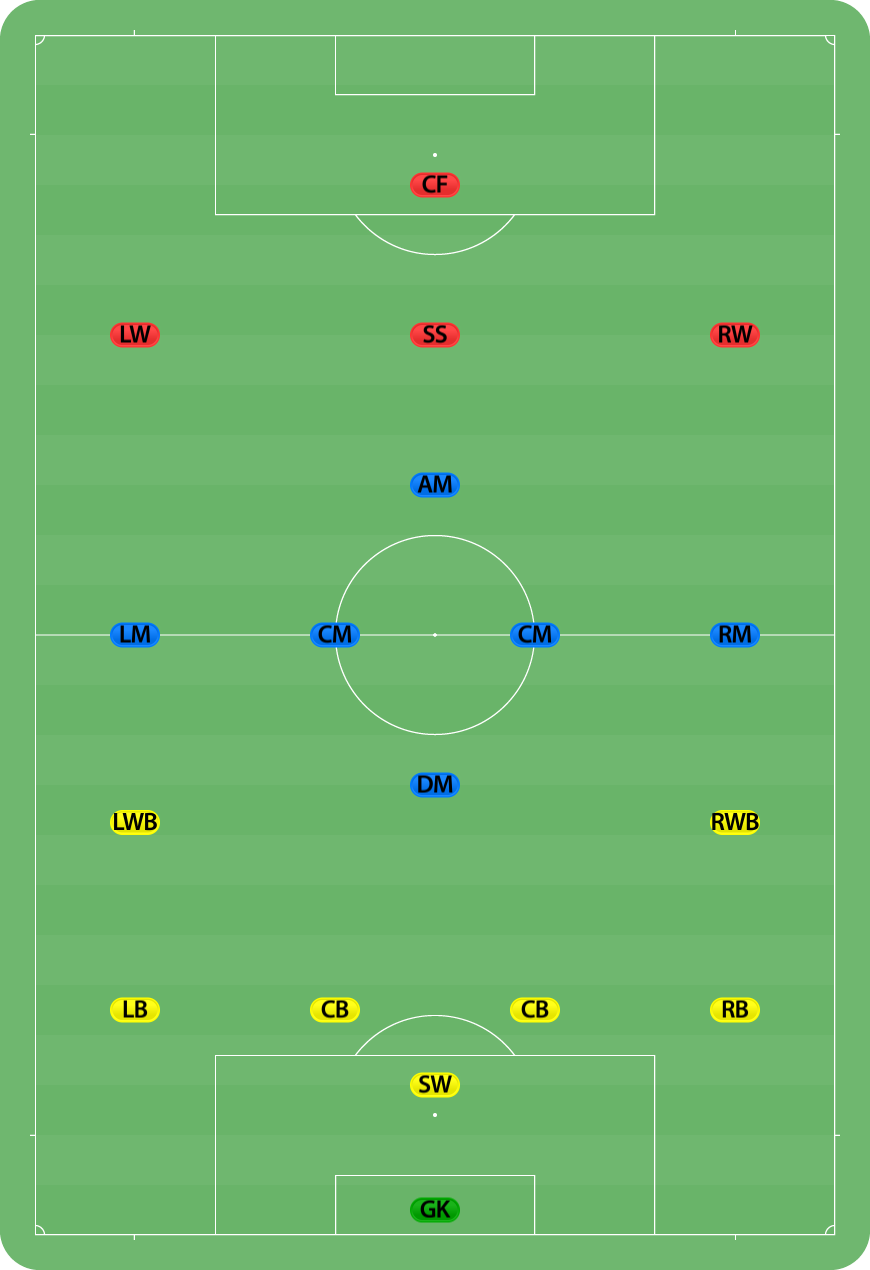

In [29]:
#exporting our data so as to conduct data visualization in tableau
gfg_csv_data = al3.to_csv('Fifa22r.csv', index = False)
print(r'"C:\Users\mokua\Desktop\Github projects\Fifa 22"', gfg_csv_data)

"C:\Users\mokua\Desktop\Github projects\Fifa 22" None


## 6. Exploratory Analysis

In [30]:
%%HTML
<div class='tableauPlaceholder' id='viz1653074739837' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FI&#47;FIFA22_16530745070990&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;FIFA22_16530745070990&#47;Story1?:language=en-US&amp;:embed=true&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;FI&#47;FIFA22_16530745070990&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1653074739837');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## 7. Feature engineering 

Our first step will be dropping unique identifiers from our data whether they are for the players or the clubs they play for or the league they are in. From our column swe have 2 columns signifying the positions the player can play one is **positions** which includes all the possible positions that a player can play and the other is **best_position** which is the best position a player can play, we will be dropping **positions** to remain with only the best possible position of a player.

In [31]:
al4 = al3.drop( columns = ['LeagueId', 'Name', 'Positions']).set_index('index')

### Categorical encoding 

Transformation of any categorical features in the data will be important to facilitate feature engineering and modelling.

In [32]:
#separating our data into the predictors, position and target variable
al4_x = al4.drop( columns = ['BestPosition', 'Overall'])
al4_y = al4[['Overall']]
al4_p = al4[['BestPosition']]

#selecting non-numeric columns from our predictors
al4o = al4_x.select_dtypes(include=['object'])
al4o.head(6)

,Nationality,Club,NationalTeam,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,League
index,,,,,,,
0,Argentina,Paris Saint-Germain,Argentina,Left,Medium,Low,French Ligue 1 (1)
1,Poland,FC Bayern München,Poland,Right,High,Medium,German 1. Bundesliga (1)
2,Portugal,Manchester United,Portugal,Right,High,Low,English Premier League (1)
3,France,Paris Saint-Germain,France,Right,High,Low,French Ligue 1 (1)
4,Slovenia,Atlético de Madrid,Not in team,Right,Medium,Medium,Spain Primera Division (1)
5,Belgium,Manchester City,Belgium,Right,High,High,English Premier League (1)


From our features above we have ordinal and nominal variables.
> **Ordinal** - These are attacking work rate and defensive work rate since this categories can be ranked we will apply ordinal encoding here.
> **Nominal** - These are the variable in our data that do not assume ordering from our data these include nationality, club, national team, preferred foot and league

For the ordinal features we will assign numeric values based on our intution 
> high > medium >low 

In [33]:
ordinal = al4o[['AttackingWorkRate', 'DefensiveWorkRate']]
#transforming
ordinal['AttackingWorkRate'] = ordinal['AttackingWorkRate'].replace(['Medium','High', 'Low'],[2, 3, 1])
ordinal['DefensiveWorkRate'] = ordinal['DefensiveWorkRate'].replace(['Medium','High', 'Low'],[2, 3, 1])

For the nominal features we will aplly target encoding specifically mean encoding to our columns

In [34]:
#selecting nominal features
nominal = al4o[['Nationality', 'Club', 'NationalTeam', 'PreferredFoot', 'League']]

from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols = ['Nationality', 'Club', 'NationalTeam', 'PreferredFoot', 'League'] , m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(nominal, al4_y)

# Encode the Zipcode column to create the final training data
n_x = encoder.transform(nominal)

#concating the datasets
m = pd.concat([n_x, ordinal], axis = 1)
n = pd.concat([al4_p, al4_y], axis = 1)
l = pd.concat([m, n], axis = 1)

#concat data with the rest of the data
ab = al4.drop(columns = l.columns)
al5 = pd.concat([ab, l], axis = 1)
al5.shape

(19156, 91)

We will group the data based on the positions of the players 

In [35]:
# splitting dataframe by groups
grouped = al5.groupby(al5.BestPosition)
RW = grouped.get_group("RW")
ST = grouped.get_group("ST")
GK = grouped.get_group("GK")
CM = grouped.get_group("CM")
LW = grouped.get_group("LW")
CDM = grouped.get_group("CDM")
LM = grouped.get_group("LM")
CF = grouped.get_group("CF")
CB = grouped.get_group("CB")
CAM = grouped.get_group("CAM")
LB = grouped.get_group("LB")
RB = grouped.get_group("RB")
RM = grouped.get_group("RM")
LWB = grouped.get_group("LWB")
RWB = grouped.get_group("RWB")

Having created groups for our players positions we will group them based on the player position similarity defenders midfielders, attackers and goalkeepers will be in individual categories.
- group_1 = goalkeeper
- group_2 = defenders = lb, lwb, cb, rb, rwb
- group_3 = midfielders = cam, cm, rm, lm, cdm
- group_4 = attackers = cf, st, lw, rw

In [36]:
#creating the groups
g1 = GK
g2 = pd.concat([LB, RB, CB, RWB, LWB])
g3 = pd.concat([RM, LM, CAM, CM, CDM])
g4 = pd.concat([CF, ST, LW, RW])

Since we have not decided which model we will us ein training we will employ the mutual information, a feature measuirng the assopciations between the independet variables and the features in our data.

#### Group 1

In [37]:
#choosing our target variable from the data 
g1_X = g1.drop(columns = ['Overall', 'BestPosition'])
g1_y = g1[['Overall']]

In [38]:
#creating discrete features
discrete_features = g1_X.dtypes == int

#applying the mutual information we will choose the mutual info regression since our target variable is continous
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(g1_X, g1_y, discrete_features)
mi_scores.head(60)

GKRating            2.837815
ValueEUR            1.486110
BaseStats           1.427668
PaceTotal           1.241695
GKDiving            1.235577
GKReflexes          1.213857
DribblingTotal      1.212347
PhysicalityTotal    1.210891
GKPositioning       1.199834
ShootingTotal       1.108733
GKHandling          1.081713
Potential           0.872109
Reactions           0.767157
ReleaseClause       0.714628
GKKicking           0.614977
PassingTotal        0.608156
ShotPower           0.596902
TotalStats          0.564939
WageEUR             0.533018
STRating            0.442315
RFRating            0.390246
LFRating            0.383205
CFRating            0.379060
LWRating            0.337197
LBRating            0.333587
RMRating            0.333274
LMRating            0.331642
CDMRating           0.329948
RBRating            0.324245
CMRating            0.313351
RWRating            0.311052
RWBRating           0.310021
CAMRating           0.300729
LWBRating           0.298482
CBRating      

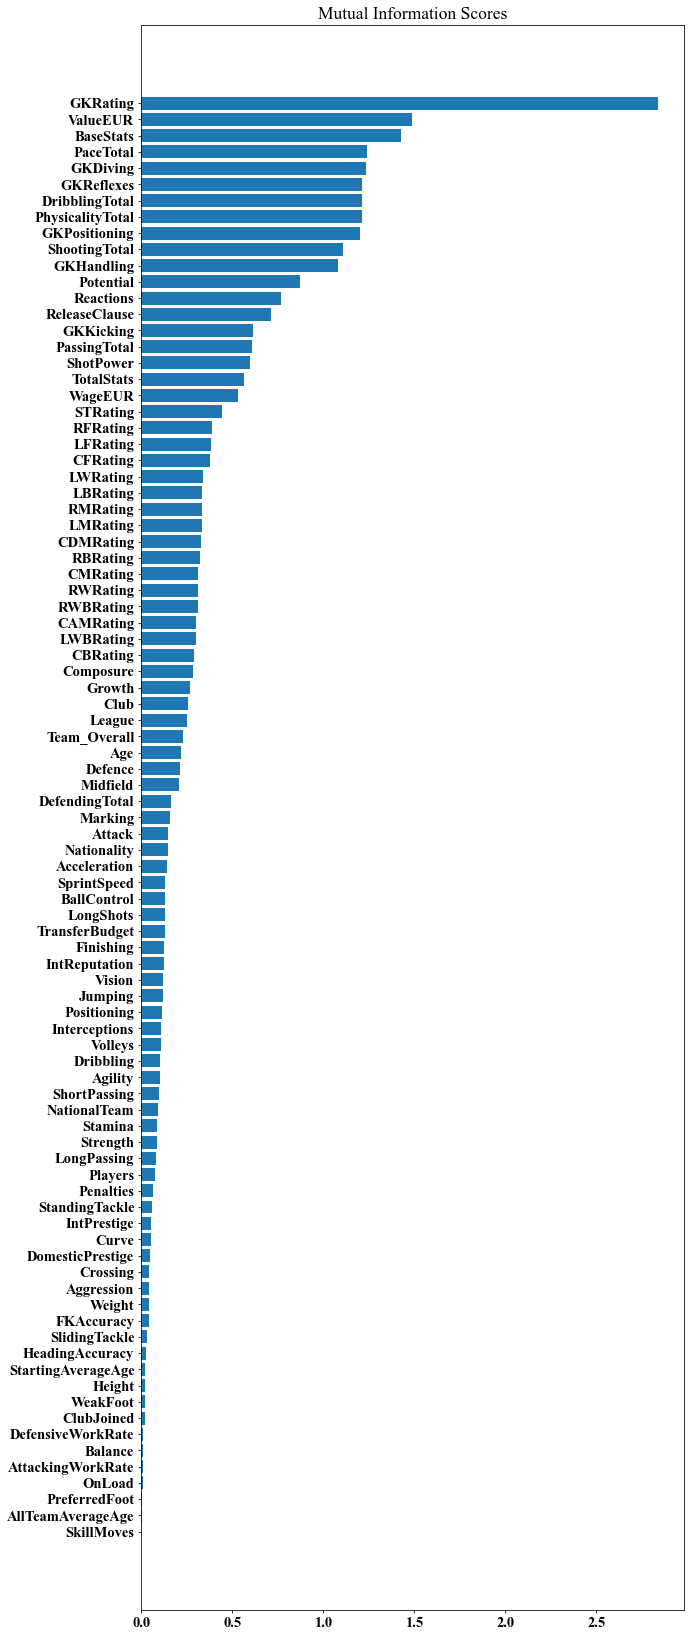

In [39]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=70, figsize=(10, 30))
plot_mi_scores(mi_scores)

We will choose faetures with an mutual information score of more than 0.5 

In [40]:
m1_scores = pd.DataFrame(mi_scores).reset_index()
m2_scores = m1_scores.rename(columns = {'index' : 'feature'})
m3_score = m2_scores[m2_scores['MI Scores'] >= 0.5]
#selecting the features
g1_x1 = g1_X[m3_score.feature.unique()]

#checking on the correlation of our variables
g1_x1.corr()

,GKRating,ValueEUR,BaseStats,PaceTotal,GKDiving,GKReflexes,DribblingTotal,PhysicalityTotal,GKPositioning,ShootingTotal,GKHandling,Potential,Reactions,ReleaseClause,GKKicking,PassingTotal,ShotPower,TotalStats,WageEUR
GKRating,1.000000,0.496861,0.967638,0.953642,0.953642,0.954430,0.954430,0.944314,0.944314,0.935310,0.935310,0.722566,0.851178,0.469092,0.818527,0.818527,0.817883,0.793150,0.579039
ValueEUR,0.496861,1.000000,0.460356,0.467500,0.467500,0.463145,0.463145,0.430243,0.430243,0.467344,0.467344,0.494729,0.386540,0.982659,0.402954,0.402954,0.402483,0.359458,0.803157
BaseStats,0.967638,0.460356,1.000000,0.928242,0.928242,0.927630,0.927630,0.922407,0.922407,0.908230,0.908230,0.656993,0.820139,0.433170,0.850685,0.850685,0.849980,0.875123,0.554500
PaceTotal,0.953642,0.467500,0.928242,1.000000,1.000000,0.919479,0.919479,0.869245,0.869245,0.865808,0.865808,0.696265,0.779681,0.439329,0.759194,0.759194,0.758652,0.748839,0.550768
GKDiving,0.953642,0.467500,0.928242,1.000000,1.000000,0.919479,0.919479,0.869245,0.869245,0.865808,0.865808,0.696265,0.779681,0.439329,0.759194,0.759194,0.758652,0.748839,0.550768
GKReflexes,0.954430,0.463145,0.927630,0.919479,0.919479,1.000000,1.000000,0.869855,0.869855,0.854767,0.854767,0.702178,0.784650,0.435519,0.759854,0.759854,0.759601,0.747712,0.547210
DribblingTotal,0.954430,0.463145,0.927630,0.919479,0.919479,1.000000,1.000000,0.869855,0.869855,0.854767,0.854767,0.702178,0.784650,0.435519,0.759854,0.759854,0.759601,0.747712,0.547210
PhysicalityTotal,0.944314,0.430243,0.922407,0.869245,0.869245,0.869855,0.869855,1.000000,1.000000,0.887368,0.887368,0.631379,0.772963,0.404966,0.775810,0.775810,0.775409,0.757318,0.517035
GKPositioning,0.944314,0.430243,0.922407,0.869245,0.869245,0.869855,0.869855,1.000000,1.000000,0.887368,0.887368,0.631379,0.772963,0.404966,0.775810,0.775810,0.775409,0.757318,0.517035
ShootingTotal,0.935310,0.467344,0.908230,0.865808,0.865808,0.854767,0.854767,0.887368,0.887368,1.000000,1.000000,0.666251,0.743121,0.442379,0.777569,0.777569,0.776406,0.726887,0.550639


#### Multicollinearity

Multicollinearity occurs when there is two or more variables in a multi regression modle that are highly corelated, when this occurs we might have difficulty in distinguishing between their individual effects on the dependent variable. The ridge rgeression model is used to analysze multiple regression data that is highly correlated. We will be detecting multicollinearity using variamce inflation factors given by **VIF = 1/(1 - Rsquared)** where R-squared is the coefficient of determination.

In [41]:
#selecting the features
goal1 = g1_x1.copy()

We will first compute the correlation coeficients of the data 

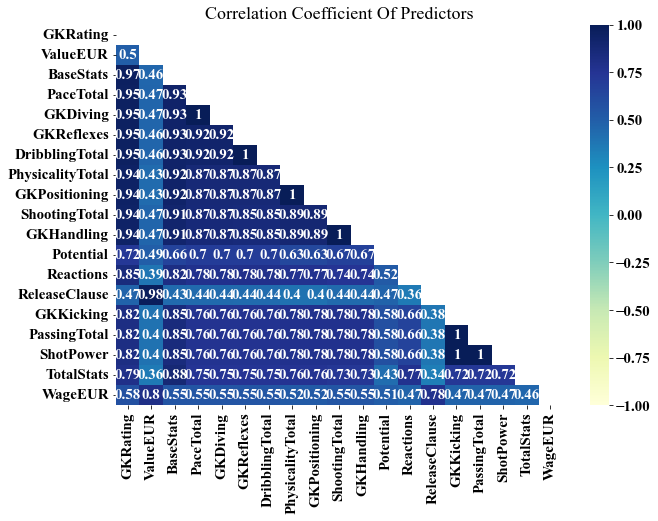

In [42]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(goal1.corr(), dtype=bool))
# generate heatmap
sb.heatmap(goal1.corr(), annot=True, mask=mask, vmin=-1, vmax=1 ,cmap="YlGnBu", center = 0)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

The correlation coefficient of most predictors is above 0.8 which shows very high multicollinearity in the predictors.

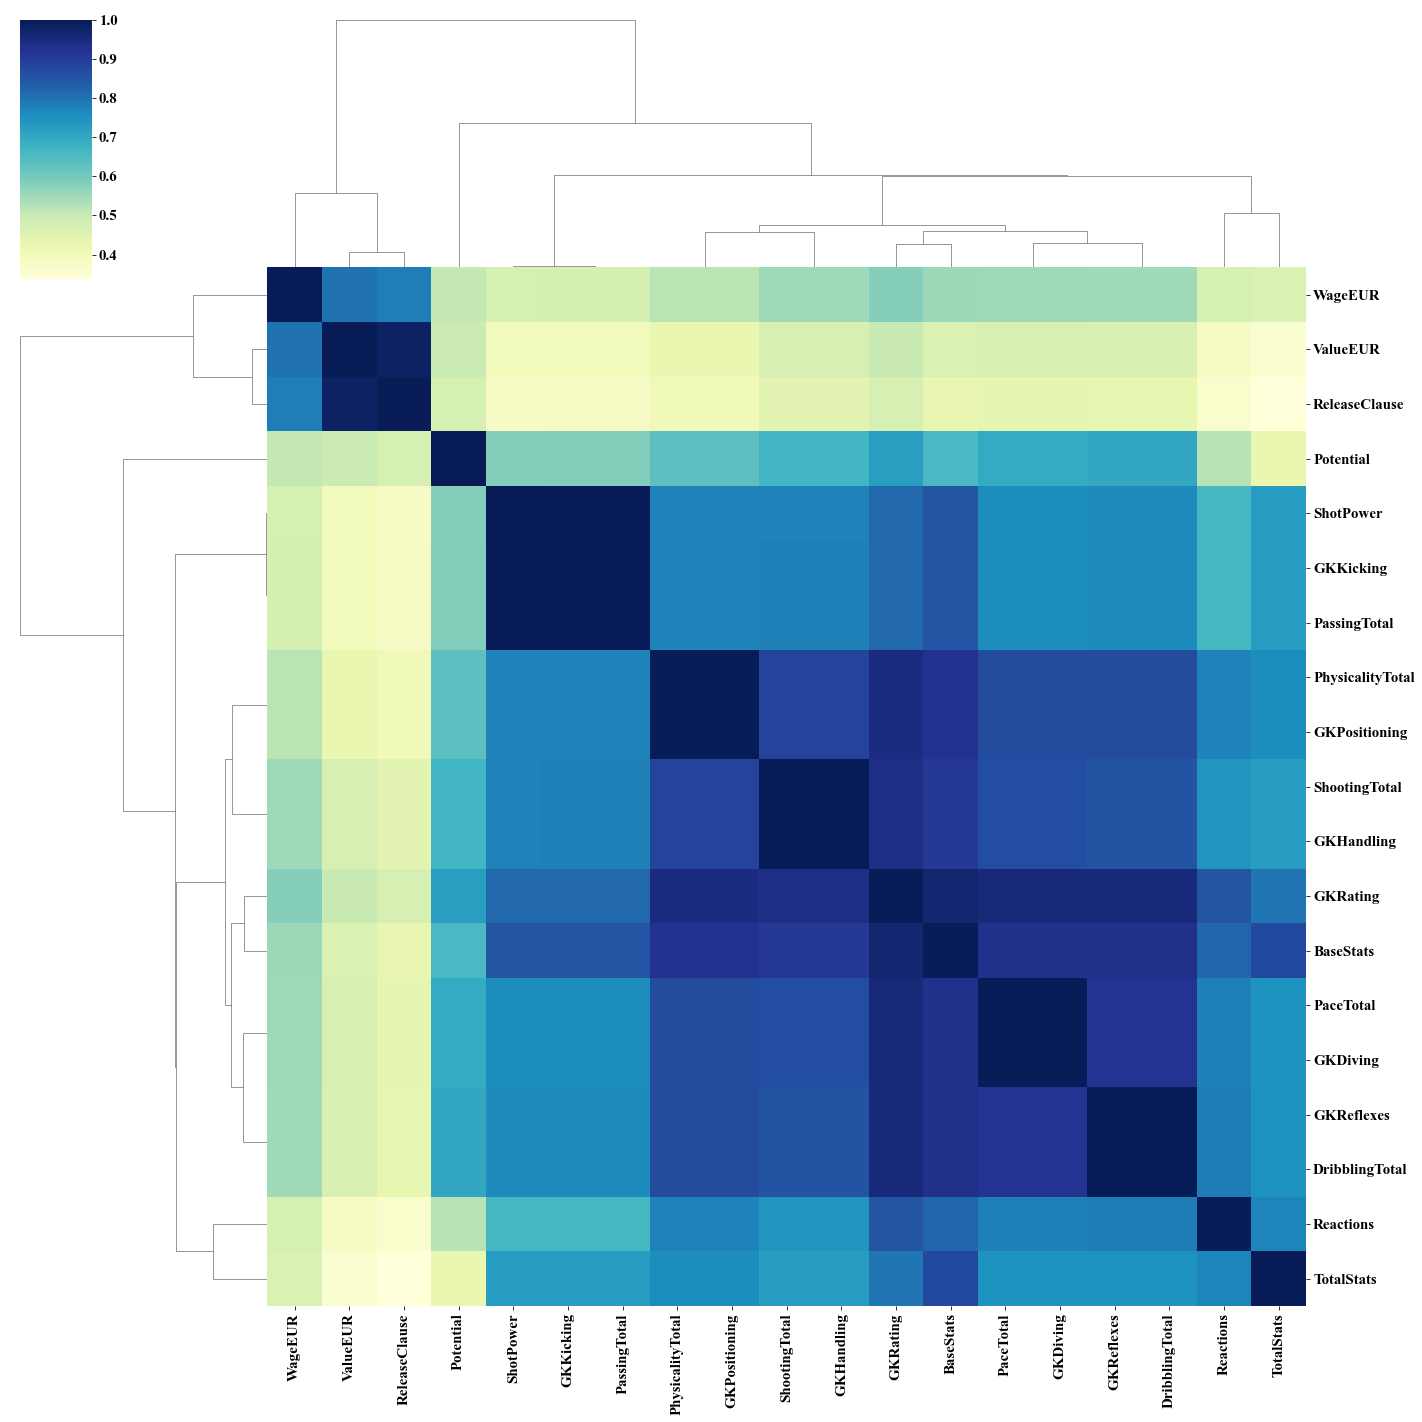

In [43]:
#plotting a cluster map
sb.clustermap(goal1.corr(), figsize=(20,20), cmap = "YlGnBu")

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating a function to test for vif cores  
def compute_vif(considered_features):
    X = considered_features
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

#checking the vif scores for our data
y = compute_vif(goal1)
goal1.drop(columns = ['intercept'], inplace = True)
y

,Variable,VIF
0,GKRating,273.747011
1,ValueEUR,32.893035
2,BaseStats,44.482996
3,PaceTotal,inf
4,GKDiving,inf
5,GKReflexes,inf
6,DribblingTotal,inf
7,PhysicalityTotal,inf
8,GKPositioning,inf
9,ShootingTotal,inf


From our visualizations above we have seen that our predictors are higly corellated dropping some of the higly correlated features will lead to us loosing a lot of information from the data about 90% since we will remain with only three columns.

In [45]:
#describing our features
goal1.describe()

,GKRating,ValueEUR,BaseStats,PaceTotal,GKDiving,GKReflexes,DribblingTotal,PhysicalityTotal,GKPositioning,ShootingTotal,GKHandling,Potential,Reactions,ReleaseClause,GKKicking,PassingTotal,ShotPower,TotalStats,WageEUR
count,2113.000000,2.113000e+03,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2.113000e+03,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,65.108377,1.945269e+06,355.100805,65.001893,65.001893,65.952674,65.952674,63.194983,63.194983,62.738287,62.738287,69.779934,58.028396,3.543019e+06,61.734501,61.734501,46.434927,1046.335069,6348.887837
std,7.349570,6.682800e+06,41.895294,7.486098,7.486098,7.929891,7.929891,8.409266,8.409266,7.192506,7.192506,6.253131,10.690203,1.319192e+07,7.279396,7.279396,5.473736,142.381724,15653.275248
min,49.000000,9.000000e+03,260.000000,42.000000,42.000000,45.000000,45.000000,38.000000,38.000000,43.000000,43.000000,51.000000,25.000000,0.000000e+00,40.000000,40.000000,30.000000,767.000000,500.000000
25%,60.000000,2.500000e+05,325.000000,60.000000,60.000000,60.000000,60.000000,57.000000,57.000000,58.000000,58.000000,66.000000,51.000000,3.940000e+05,57.000000,57.000000,43.000000,924.000000,750.000000
50%,65.000000,5.000000e+05,354.000000,65.000000,65.000000,66.000000,66.000000,63.000000,63.000000,62.000000,62.000000,70.000000,59.000000,8.550000e+05,61.000000,61.000000,46.000000,1048.000000,2000.000000
75%,70.000000,1.200000e+06,383.000000,70.000000,70.000000,71.000000,71.000000,69.000000,69.000000,67.000000,67.000000,74.000000,66.000000,2.100000e+06,66.000000,66.000000,50.000000,1153.000000,5000.000000
max,92.000000,1.195000e+08,501.000000,91.000000,91.000000,90.000000,90.000000,92.000000,92.000000,92.000000,92.000000,93.000000,88.000000,2.380000e+08,93.000000,93.000000,70.000000,1583.000000,250000.000000


From the table above we see that our feature are plotted on diffrent scales for exmaple most of the data is on the scale of **0 - 100** while the other features range on scales such as from **0 - 238,000,000** rescaling our data will be important in our training.

We will use the L1 normalization to rescale our data we will do this by modifying values in each of our rows in teh dataset the sum of the sbsolute will always be 1

In [46]:
# rescaling our features using minmax scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
g_norm = pd.DataFrame(scaler.fit_transform(goal1.values))
g_norm.columns = goal1.columns

#adding index 
i = pd.DataFrame(goal1.index)
g_norm1 = pd.concat([g_norm, i], axis = 1)
g_norm2 = g_norm1.set_index('index')

In [47]:
#describing our rescaled dataframe 
g_norm2.describe()

,GKRating,ValueEUR,BaseStats,PaceTotal,GKDiving,GKReflexes,DribblingTotal,PhysicalityTotal,GKPositioning,ShootingTotal,GKHandling,Potential,Reactions,ReleaseClause,GKKicking,PassingTotal,ShotPower,TotalStats,WageEUR
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.374613,0.016204,0.394609,0.469426,0.469426,0.465615,0.465615,0.466574,0.466574,0.402822,0.402822,0.447141,0.524260,0.014887,0.410085,0.410085,0.410873,0.342322,0.023442
std,0.170920,0.055927,0.173839,0.152778,0.152778,0.176220,0.176220,0.155727,0.155727,0.146786,0.146786,0.148884,0.169686,0.055428,0.137347,0.137347,0.136843,0.174487,0.062739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255814,0.002017,0.269710,0.367347,0.367347,0.333333,0.333333,0.351852,0.351852,0.306122,0.306122,0.357143,0.412698,0.001655,0.320755,0.320755,0.325000,0.192402,0.001002
50%,0.372093,0.004109,0.390041,0.469388,0.469388,0.466667,0.466667,0.462963,0.462963,0.387755,0.387755,0.452381,0.539683,0.003592,0.396226,0.396226,0.400000,0.344363,0.006012
75%,0.488372,0.009967,0.510373,0.571429,0.571429,0.577778,0.577778,0.574074,0.574074,0.489796,0.489796,0.547619,0.650794,0.008824,0.490566,0.490566,0.500000,0.473039,0.018036
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


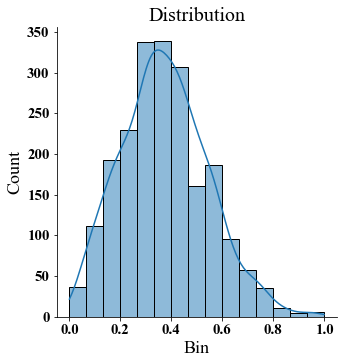

In [48]:
#checking the distribution of a random variable
sb.displot(g_norm2['GKRating'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

#### Standardization
Starndardization of our data will be the next step we will do this by changing the datas distribution into bayesian distribution 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(g_norm2.values)
g_norm3 = pd.DataFrame(scaler.transform(g_norm2.values))
g_norm3.columns = goal1.columns

#adding index 
i = pd.DataFrame(goal1.index)
g_normm = pd.concat([g_norm3, i], axis = 1)
g_norm4 = g_normm.set_index('index')
g_norm4.describe()

,GKRating,ValueEUR,BaseStats,PaceTotal,GKDiving,GKReflexes,DribblingTotal,PhysicalityTotal,GKPositioning,ShootingTotal,GKHandling,Potential,Reactions,ReleaseClause,GKKicking,PassingTotal,ShotPower,TotalStats,WageEUR
count,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03,2.113000e+03
mean,-2.454365e-15,8.223164e-16,2.015425e-15,2.118093e-15,2.118093e-15,2.156765e-15,2.156765e-15,1.226132e-15,1.226132e-15,-3.202991e-15,-3.202991e-15,1.700906e-15,4.188163e-16,2.151353e-16,-7.631273e-16,-7.631273e-16,9.953651e-16,2.910329e-16,-4.615333e-16
std,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00,1.000237e+00
min,-2.192263e+00,-2.898078e-01,-2.270501e+00,-3.073342e+00,-3.073342e+00,-2.642865e+00,-2.642865e+00,-2.996807e+00,-2.996807e+00,-2.744935e+00,-2.744935e+00,-3.003996e+00,-3.090326e+00,-2.686385e-01,-2.986463e+00,-2.986463e+00,-3.003217e+00,-1.962339e+00,-3.737411e-01
25%,-6.952224e-01,-2.537365e-01,-7.186471e-01,-6.683157e-01,-6.683157e-01,-7.508404e-01,-7.508404e-01,-7.368598e-01,-7.368598e-01,-6.589371e-01,-6.589371e-01,-6.046297e-01,-6.576170e-01,-2.387646e-01,-6.505514e-01,-6.505514e-01,-6.276772e-01,-8.594082e-01,-3.577662e-01
50%,-1.474948e-02,-2.163182e-01,-2.628136e-02,-2.529343e-04,-2.529343e-04,5.969474e-03,5.969474e-03,-2.319223e-02,-2.319223e-02,-1.026710e-01,-1.026710e-01,3.520130e-02,9.090888e-02,-2.038107e-01,-1.009252e-01,-1.009252e-01,-7.947580e-02,1.169620e-02,-2.778918e-01
75%,6.657234e-01,-1.115469e-01,6.660843e-01,6.678099e-01,6.678099e-01,6.366444e-01,6.366444e-01,6.904753e-01,6.904753e-01,5.926616e-01,5.926616e-01,6.750323e-01,7.458690e-01,-1.094125e-01,5.861075e-01,5.861075e-01,6.514594e-01,7.493250e-01,-8.619328e-02
max,3.659804e+00,1.759480e+01,3.483296e+00,3.473674e+00,3.473674e+00,3.033209e+00,3.033209e+00,3.426201e+00,3.426201e+00,4.069325e+00,4.069325e+00,3.714230e+00,2.804315e+00,1.777698e+01,4.296084e+00,4.296084e+00,4.306136e+00,3.770090e+00,1.556919e+01


### Group 2

#### Mutual information 

In [50]:
#choosing the label and predictor
g2_x = g2.drop(columns = ['Overall', 'BestPosition'])
g2_y = g2[['Overall']]
#using mutual information score to asses importance of each column 
discrete_features = g2_x.dtypes == int
mi_scores = make_mi_scores(g2_x, g2_y, discrete_features)
mi_scores.head(60)

RBRating            1.498365
LBRating            1.482723
CBRating            1.436346
ValueEUR            1.406673
CDMRating           1.332824
RWBRating           1.174018
LWBRating           1.161486
DefendingTotal      1.016948
ReleaseClause       0.962234
Interceptions       0.850075
Potential           0.830372
Reactions           0.818576
SlidingTackle       0.815619
StandingTackle      0.803117
Marking             0.758061
WageEUR             0.680176
Composure           0.632063
ShortPassing        0.629227
CMRating            0.618443
BaseStats           0.566214
TotalStats          0.535784
BallControl         0.514701
LMRating            0.493392
RMRating            0.491236
Club                0.468188
STRating            0.449424
Defence             0.447305
Team_Overall        0.431471
CAMRating           0.419438
PassingTotal        0.414354
LongPassing         0.402172
Midfield            0.399696
RFRating            0.396326
CFRating            0.390387
LWRating      

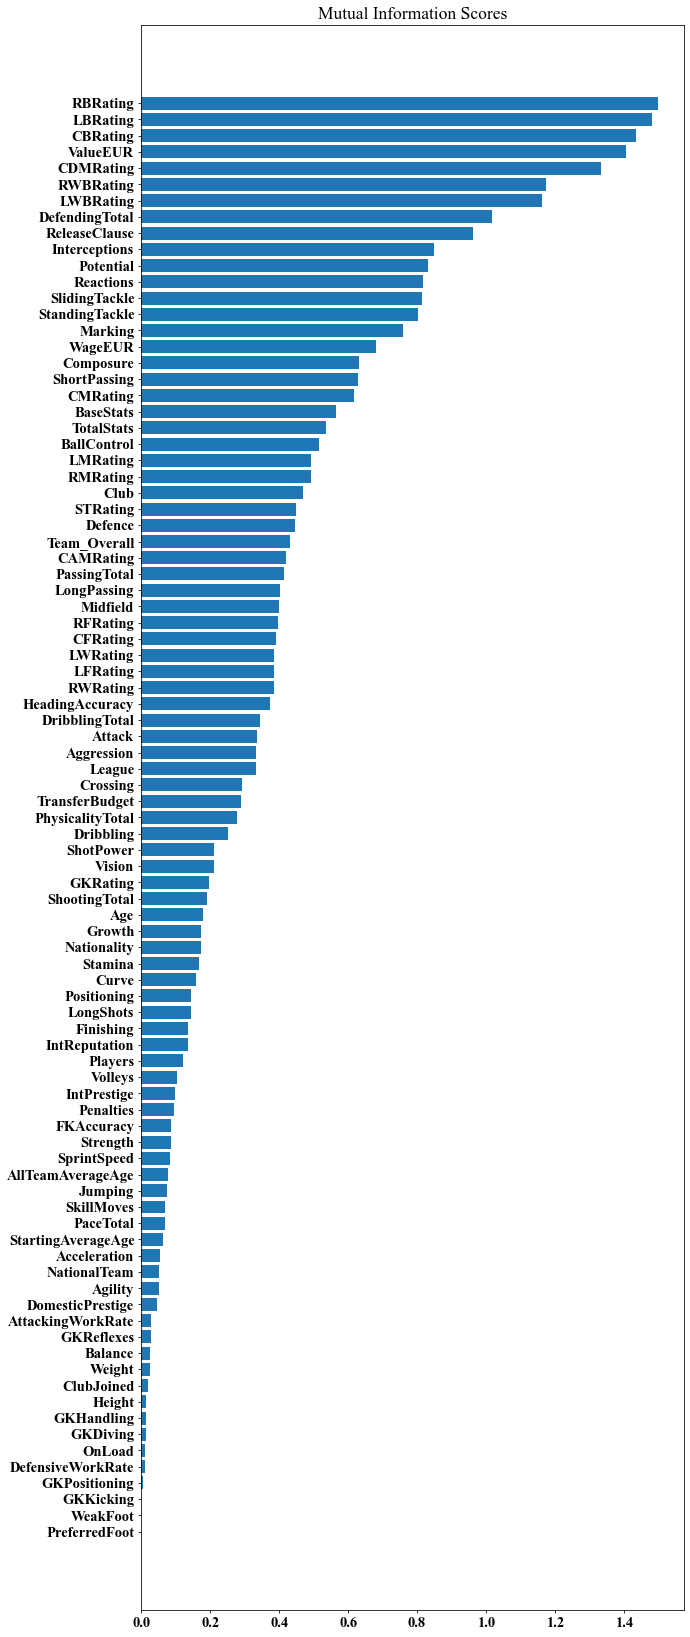

In [51]:
#plotting the mi scores
plt.figure(dpi=70, figsize=(10, 30))
plot_mi_scores(mi_scores)

In [52]:
#selecting features with mi scores more than 0.5
m1_scores = pd.DataFrame(mi_scores).reset_index()
m2_scores = m1_scores.rename(columns = {'index' : 'feature'})
m3_score = m2_scores[m2_scores['MI Scores'] >= 0.5]
#selecting the features
g2_x1 = g2_x[m3_score.feature.unique()]
#checking on the correlation of our variables
g2_x1.corr()

,RBRating,LBRating,CBRating,ValueEUR,CDMRating,RWBRating,LWBRating,DefendingTotal,ReleaseClause,Interceptions,...,SlidingTackle,StandingTackle,Marking,WageEUR,Composure,ShortPassing,CMRating,BaseStats,TotalStats,BallControl
RBRating,1.000000,1.000000,0.839695,0.557226,0.932614,0.986638,0.986638,0.805144,0.533857,0.810654,...,0.815356,0.787337,0.765898,0.604255,0.777452,0.836973,0.903579,0.912029,0.894981,0.850959
LBRating,1.000000,1.000000,0.839695,0.557226,0.932614,0.986638,0.986638,0.805144,0.533857,0.810654,...,0.815356,0.787337,0.765898,0.604255,0.777452,0.836973,0.903579,0.912029,0.894981,0.850959
CBRating,0.839695,0.839695,1.000000,0.550729,0.930579,0.763073,0.763073,0.969407,0.527555,0.917578,...,0.897175,0.921620,0.914446,0.607467,0.789792,0.755279,0.701505,0.663039,0.654357,0.646789
ValueEUR,0.557226,0.557226,0.550729,1.000000,0.535018,0.522341,0.522341,0.531348,0.977232,0.513775,...,0.532604,0.531408,0.494990,0.805516,0.440569,0.429365,0.453335,0.452007,0.431789,0.409419
CDMRating,0.932614,0.932614,0.930579,0.535018,1.000000,0.900292,0.900292,0.894210,0.512343,0.884489,...,0.841198,0.847563,0.858159,0.598391,0.842323,0.897709,0.896359,0.832876,0.832005,0.819007
RWBRating,0.986638,0.986638,0.763073,0.522341,0.900292,1.000000,1.000000,0.719894,0.500045,0.743086,...,0.741840,0.705893,0.690370,0.566814,0.747093,0.837180,0.931989,0.942170,0.925288,0.879288
LWBRating,0.986638,0.986638,0.763073,0.522341,0.900292,1.000000,1.000000,0.719894,0.500045,0.743086,...,0.741840,0.705893,0.690370,0.566814,0.747093,0.837180,0.931989,0.942170,0.925288,0.879288
DefendingTotal,0.805144,0.805144,0.969407,0.531348,0.894210,0.719894,0.719894,1.000000,0.510286,0.938414,...,0.917257,0.952984,0.953210,0.599412,0.771199,0.701824,0.642959,0.584834,0.591070,0.586230
ReleaseClause,0.533857,0.533857,0.527555,0.977232,0.512343,0.500045,0.500045,0.510286,1.000000,0.492851,...,0.512293,0.510683,0.475556,0.780849,0.417260,0.411979,0.433444,0.430355,0.411305,0.389869
Interceptions,0.810654,0.810654,0.917578,0.513775,0.884489,0.743086,0.743086,0.938414,0.492851,1.000000,...,0.844005,0.862771,0.877998,0.581984,0.761824,0.697434,0.673734,0.614422,0.623865,0.611301


#### Multicollinearity 

In [53]:
#selecting the features
def1 = g2_x1.copy()

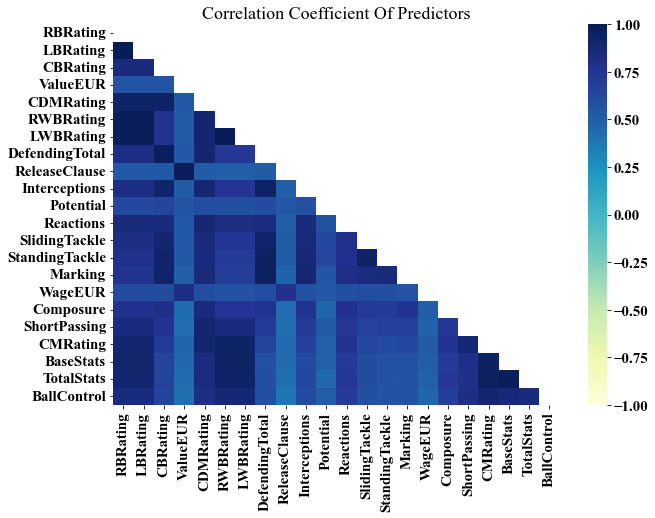

In [54]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(def1.corr(), dtype=bool))
# generate heatmap
sb.heatmap(def1.corr(), mask=mask, vmin=-1, vmax=1 ,cmap="YlGnBu", center = 0)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

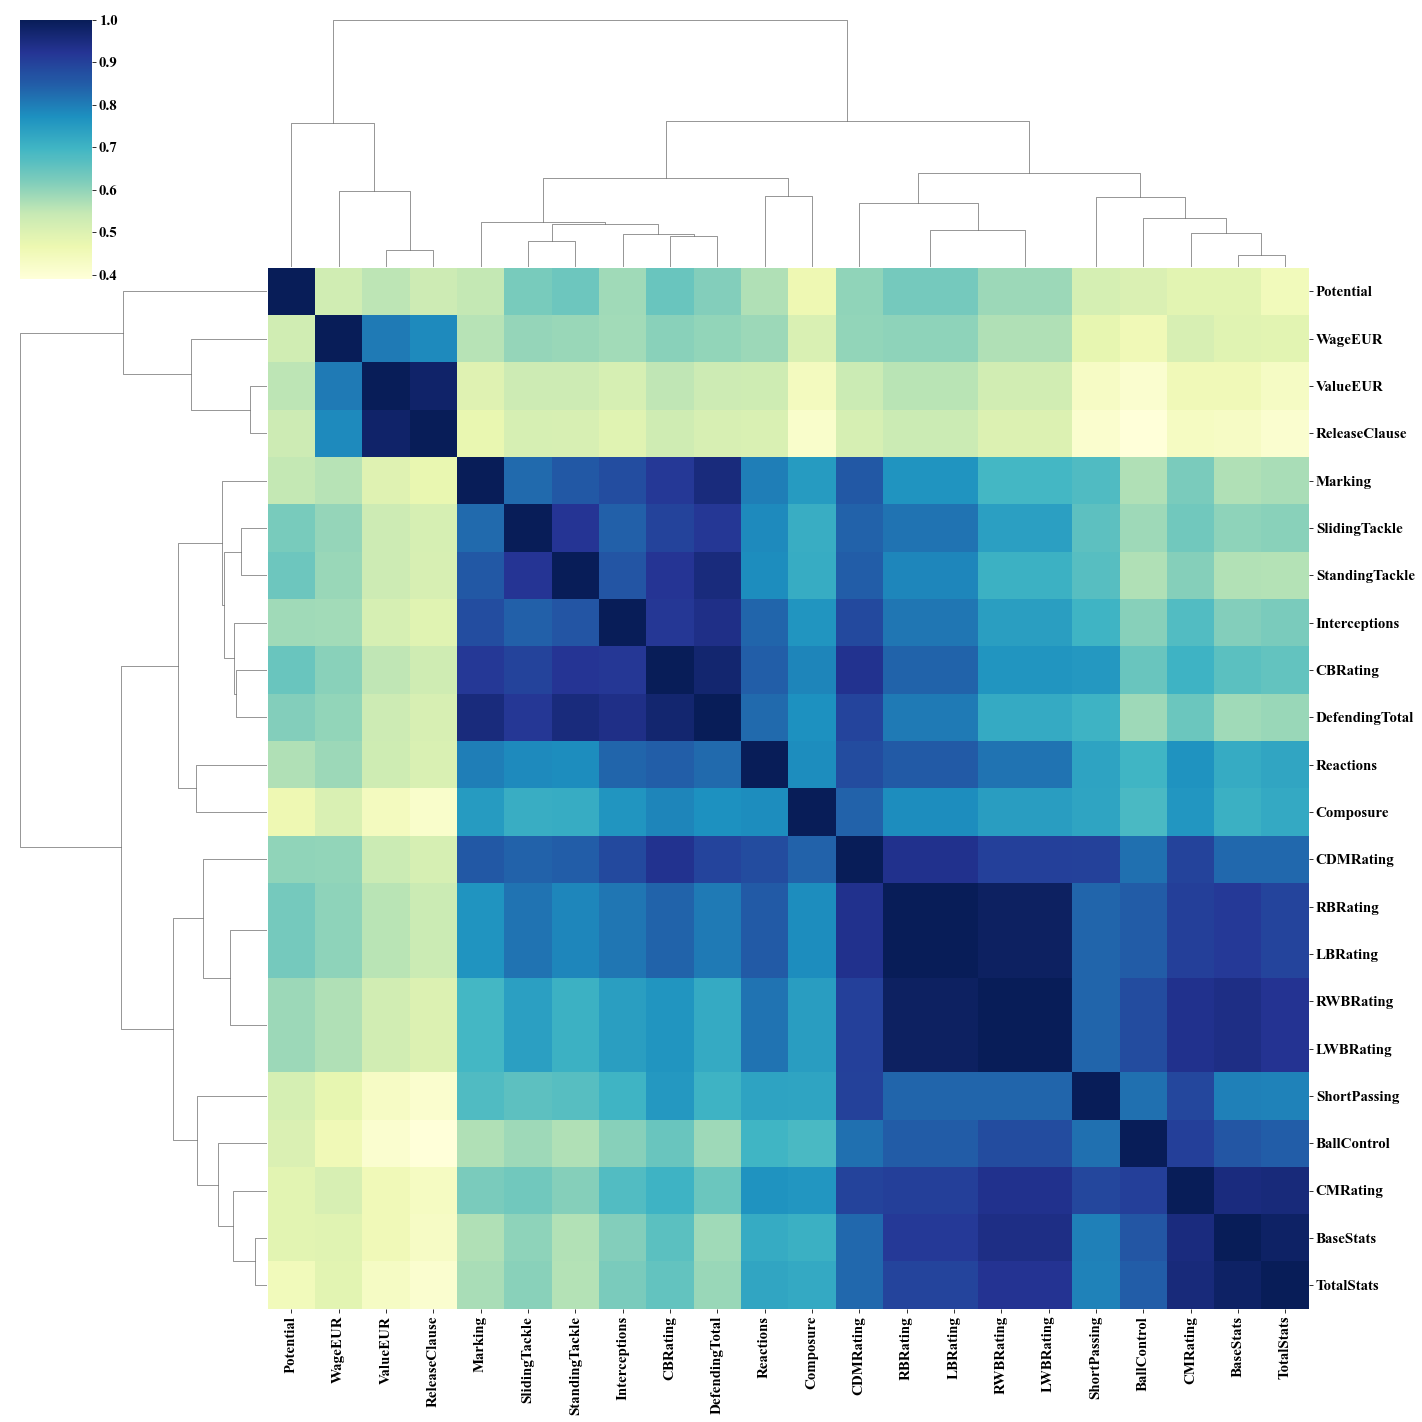

In [55]:
#plotting a cluster map
sb.clustermap(def1.corr(), figsize=(20,20), cmap = "YlGnBu")

In [56]:
#checking the vif scores for our data
y = compute_vif(def1)
def1.drop(columns = ['intercept'], inplace = True)
y

,Variable,VIF
0,RBRating,inf
1,LBRating,inf
2,CBRating,55.170551
3,ValueEUR,25.374171
4,CDMRating,106.751475
5,RWBRating,inf
6,LWBRating,inf
7,DefendingTotal,186.060041
8,ReleaseClause,22.421697
9,Interceptions,16.581896


In [57]:
#describing our features
def1.describe()

,RBRating,LBRating,CBRating,ValueEUR,CDMRating,RWBRating,LWBRating,DefendingTotal,ReleaseClause,Interceptions,...,SlidingTackle,StandingTackle,Marking,WageEUR,Composure,ShortPassing,CMRating,BaseStats,TotalStats,BallControl
count,6464.000000,6464.000000,6464.000000,6.464000e+03,6464.000000,6464.000000,6464.000000,6464.000000,6.464000e+03,6464.000000,...,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,64.347308,64.347308,65.750928,2.525258e+06,63.599629,63.450186,63.450186,63.997834,4.506180e+06,63.440439,...,64.178682,65.939975,63.370514,8507.990408,57.599010,59.955136,57.635829,347.334158,1609.824567,58.333075
std,6.525771,6.525771,6.561401,6.210113e+06,7.189935,6.974501,6.974501,7.198754,1.189996e+07,7.741262,...,7.050081,7.009892,7.958538,16833.342427,10.155153,9.543705,8.544255,41.409176,197.193605,9.916141
min,46.000000,46.000000,45.000000,0.000000e+00,42.000000,44.000000,44.000000,43.000000,0.000000e+00,40.000000,...,42.000000,42.000000,34.000000,500.000000,30.000000,23.000000,34.000000,227.000000,1068.000000,24.000000
25%,60.000000,60.000000,62.000000,4.750000e+05,59.000000,59.000000,59.000000,59.000000,7.120000e+05,58.000000,...,60.000000,62.000000,58.000000,1000.000000,50.000000,55.000000,52.000000,318.000000,1464.000000,53.000000
50%,64.000000,64.000000,66.000000,9.250000e+05,64.000000,63.000000,63.000000,64.000000,1.500000e+06,63.000000,...,64.000000,66.000000,63.000000,3000.000000,58.000000,61.000000,58.000000,346.000000,1599.000000,59.000000
75%,68.000000,68.000000,70.000000,1.900000e+06,68.000000,68.000000,68.000000,69.000000,3.300000e+06,69.000000,...,69.000000,70.000000,69.000000,8000.000000,65.000000,66.000000,63.000000,376.000000,1745.000000,65.000000
max,87.000000,87.000000,89.000000,1.140000e+08,88.000000,88.000000,88.000000,91.000000,2.195000e+08,90.000000,...,92.000000,92.000000,93.000000,230000.000000,90.000000,88.000000,87.000000,482.000000,2292.000000,88.000000


#### Rescaling 

In [58]:
# rescaling our features using minmax scaler 
d_norm = pd.DataFrame(scaler.fit_transform(def1.values))
d_norm.columns = def1.columns

#adding index 
i = pd.DataFrame(def1.index)
d_norm1 = pd.concat([d_norm, i], axis = 1)
d_norm2 = d_norm1.set_index('index')

#describing our rescaled dataframe 
d_norm2.describe()

,RBRating,LBRating,CBRating,ValueEUR,CDMRating,RWBRating,LWBRating,DefendingTotal,ReleaseClause,Interceptions,...,SlidingTackle,StandingTackle,Marking,WageEUR,Composure,ShortPassing,CMRating,BaseStats,TotalStats,BallControl
count,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,...,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03
mean,7.749577e-17,7.749577e-17,-4.218710e-15,2.964316e-16,-2.915022e-15,6.635918e-15,6.635918e-15,4.225443e-15,-8.913301e-16,1.684090e-15,...,-1.619991e-16,-1.110498e-14,3.263479e-15,-2.447205e-15,5.031729e-15,-1.340993e-15,-6.211341e-16,5.114102e-15,1.702090e-15,6.578449e-15
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,...,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.811733e+00,-2.811733e+00,-3.162820e+00,-4.066678e-01,-3.004380e+00,-2.788973e+00,-2.788973e+00,-2.917096e+00,-3.787013e-01,-3.028221e+00,...,-3.146120e+00,-3.415434e+00,-3.690726e+00,-4.757587e-01,-2.717945e+00,-3.872500e+00,-2.766497e+00,-2.906203e+00,-2.747891e+00,-3.462610e+00
25%,-6.662269e-01,-6.662269e-01,-5.717099e-01,-3.301737e-01,-6.397811e-01,-6.381145e-01,-6.381145e-01,-6.943175e-01,-3.188645e-01,-7.028389e-01,...,-5.927599e-01,-5.621028e-01,-6.748638e-01,-4.460535e-01,-7.483489e-01,-5.192448e-01,-6.596556e-01,-7.084523e-01,-7.395567e-01,-5.378592e-01
50%,-5.322513e-02,-5.322513e-02,3.796309e-02,-2.577057e-01,5.568928e-02,-6.455236e-02,-6.455236e-02,3.008867e-04,-2.526406e-01,-5.689944e-02,...,-2.534662e-02,8.563526e-03,-4.655909e-02,-3.272325e-01,3.948942e-02,1.094905e-01,4.262501e-02,-3.222140e-02,-5.489734e-02,6.726166e-02
75%,5.597767e-01,5.597767e-01,6.476361e-01,-1.006916e-01,6.120656e-01,6.524003e-01,6.524003e-01,6.949193e-01,-1.013679e-01,7.182280e-01,...,6.839200e-01,5.792298e-01,7.074065e-01,-3.017997e-02,7.288480e-01,6.334365e-01,6.278588e-01,6.923118e-01,6.855491e-01,6.723825e-01
max,3.471535e+00,3.471535e+00,3.543583e+00,1.795191e+01,3.393947e+00,3.520211e+00,3.520211e+00,3.751240e+00,1.806817e+01,3.431174e+00,...,3.946546e+00,3.717895e+00,3.723269e+00,1.315895e+01,3.190843e+00,2.938799e+00,3.436981e+00,3.252329e+00,3.459687e+00,2.992013e+00


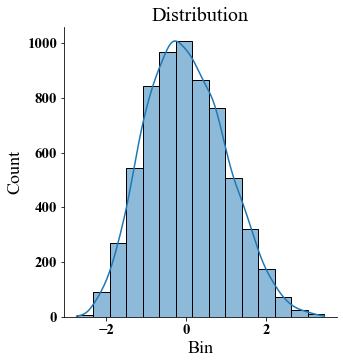

In [59]:
#checking the distribution of a random variable
sb.displot(d_norm2['TotalStats'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

#### Standardization

In [60]:
#standardizing our data
scaler = StandardScaler().fit(d_norm2.values)
d_norm3 = pd.DataFrame(scaler.transform(d_norm2.values))
d_norm3.columns = def1.columns

#adding index 
i = pd.DataFrame(def1.index)
d_normm = pd.concat([d_norm3, i], axis = 1)
d_norm4 = d_normm.set_index('index')
d_norm4.describe()

,RBRating,LBRating,CBRating,ValueEUR,CDMRating,RWBRating,LWBRating,DefendingTotal,ReleaseClause,Interceptions,...,SlidingTackle,StandingTackle,Marking,WageEUR,Composure,ShortPassing,CMRating,BaseStats,TotalStats,BallControl
count,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,...,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03,6.464000e+03
mean,-1.934646e-16,-1.934646e-16,-4.351442e-15,3.153762e-16,-2.928213e-15,6.559384e-15,6.559384e-15,4.259107e-15,-8.913301e-16,1.947150e-15,...,1.205719e-16,-1.071901e-14,3.122227e-15,-2.447171e-15,4.999542e-15,-1.356829e-15,-6.271798e-16,4.683822e-15,1.402069e-15,6.580923e-15
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,...,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.811733e+00,-2.811733e+00,-3.162820e+00,-4.066678e-01,-3.004380e+00,-2.788973e+00,-2.788973e+00,-2.917096e+00,-3.787013e-01,-3.028221e+00,...,-3.146120e+00,-3.415434e+00,-3.690726e+00,-4.757587e-01,-2.717945e+00,-3.872500e+00,-2.766497e+00,-2.906203e+00,-2.747891e+00,-3.462610e+00
25%,-6.662269e-01,-6.662269e-01,-5.717099e-01,-3.301737e-01,-6.397811e-01,-6.381145e-01,-6.381145e-01,-6.943175e-01,-3.188645e-01,-7.028389e-01,...,-5.927599e-01,-5.621028e-01,-6.748638e-01,-4.460535e-01,-7.483489e-01,-5.192448e-01,-6.596556e-01,-7.084523e-01,-7.395567e-01,-5.378592e-01
50%,-5.322513e-02,-5.322513e-02,3.796309e-02,-2.577057e-01,5.568928e-02,-6.455236e-02,-6.455236e-02,3.008867e-04,-2.526406e-01,-5.689944e-02,...,-2.534662e-02,8.563526e-03,-4.655909e-02,-3.272325e-01,3.948942e-02,1.094905e-01,4.262501e-02,-3.222140e-02,-5.489734e-02,6.726166e-02
75%,5.597767e-01,5.597767e-01,6.476361e-01,-1.006916e-01,6.120656e-01,6.524003e-01,6.524003e-01,6.949193e-01,-1.013679e-01,7.182280e-01,...,6.839200e-01,5.792298e-01,7.074065e-01,-3.017997e-02,7.288480e-01,6.334365e-01,6.278588e-01,6.923118e-01,6.855491e-01,6.723825e-01
max,3.471535e+00,3.471535e+00,3.543583e+00,1.795191e+01,3.393947e+00,3.520211e+00,3.520211e+00,3.751240e+00,1.806817e+01,3.431174e+00,...,3.946546e+00,3.717895e+00,3.723269e+00,1.315895e+01,3.190843e+00,2.938799e+00,3.436981e+00,3.252329e+00,3.459687e+00,2.992013e+00


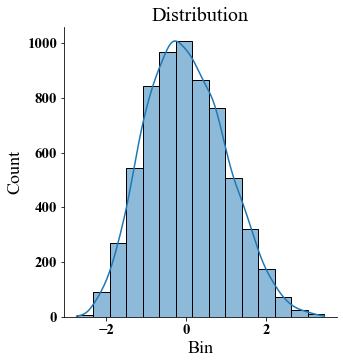

In [61]:
#checking the distribution of a random variable
sb.displot(d_norm2['TotalStats'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

### Group 3

#### Mutual information

In [62]:
#choosing the label and predictor
g3_x = g3.drop(columns = ['Overall', 'BestPosition'])
g3_y = g3[['Overall']]
#using mutual information score to asses importance of each column 
discrete_features = g3_x.dtypes == int
mi_scores = make_mi_scores(g3_x, g3_y, discrete_features)
mi_scores.head(60)

ValueEUR            1.517323
LMRating            1.328609
RMRating            1.320075
CAMRating           1.318348
CMRating            1.184502
CFRating            1.183248
RFRating            1.177137
LFRating            1.161364
LWRating            1.154943
RWRating            1.153322
ReleaseClause       0.980711
STRating            0.922767
BallControl         0.886222
TotalStats          0.838706
BaseStats           0.837684
PassingTotal        0.817782
Potential           0.783625
DribblingTotal      0.753375
Reactions           0.749350
CDMRating           0.702330
ShortPassing        0.690153
RWBRating           0.671753
WageEUR             0.665935
LWBRating           0.665358
Vision              0.627676
Dribbling           0.597946
Composure           0.580350
LBRating            0.573925
RBRating            0.573347
Positioning         0.539301
ShootingTotal       0.523485
CBRating            0.452148
LongPassing         0.442367
LongShots           0.432133
Crossing      

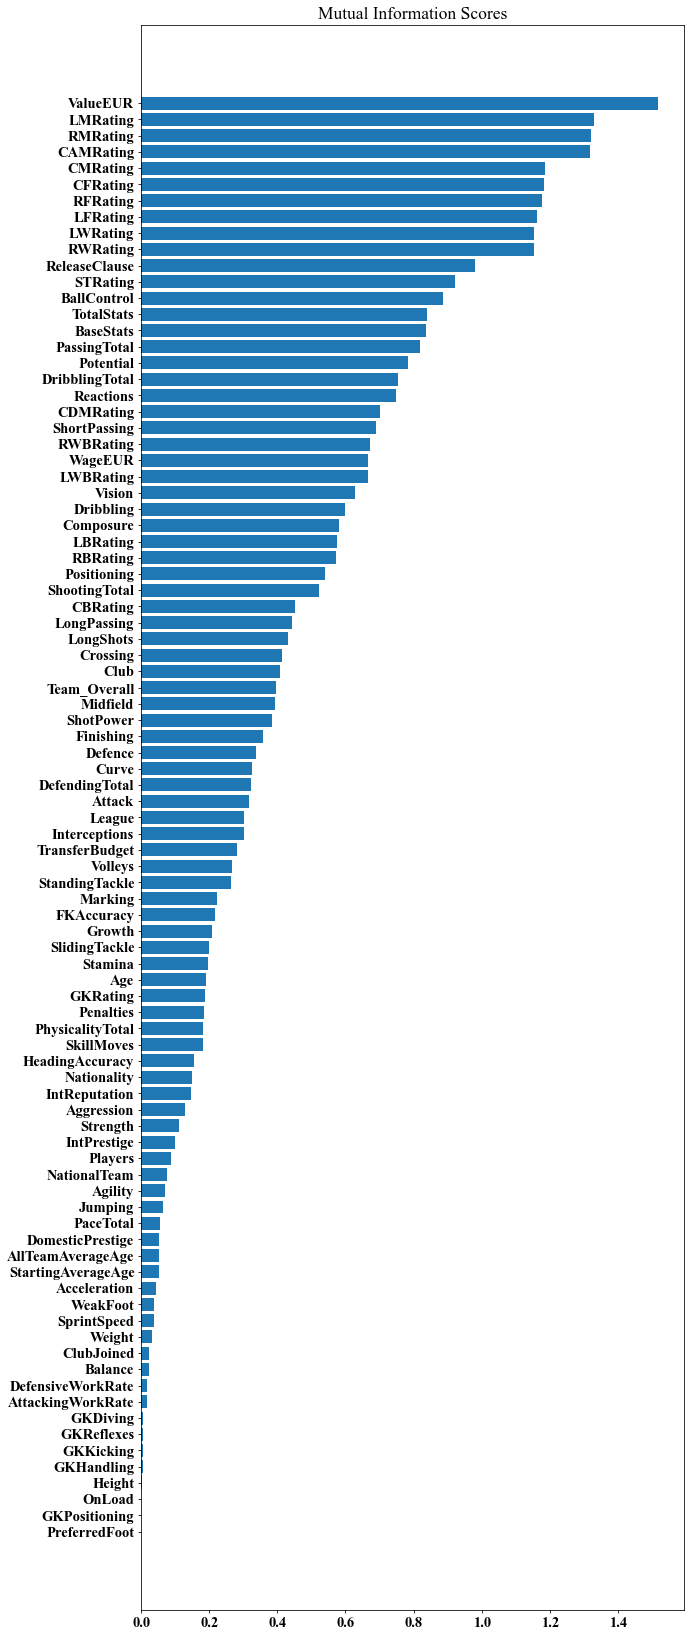

In [63]:
#plotting the mi scores
plt.figure(dpi=70, figsize=(10, 30))
plot_mi_scores(mi_scores)

In [64]:
#selecting features with mi scores more than 0.5
m1_scores = pd.DataFrame(mi_scores).reset_index()
m2_scores = m1_scores.rename(columns = {'index' : 'feature'})
m3_score = m2_scores[m2_scores['MI Scores'] >= 0.5]
#selecting the features
g3_x1 = g3_x[m3_score.feature.unique()]
#checking on the correlation of our variables
g3_x1.corr()

,ValueEUR,LMRating,RMRating,CAMRating,CMRating,CFRating,RFRating,LFRating,LWRating,RWRating,...,RWBRating,WageEUR,LWBRating,Vision,Dribbling,Composure,LBRating,RBRating,Positioning,ShootingTotal
ValueEUR,1.000000,0.582923,0.582923,0.584682,0.546413,0.552227,0.552227,0.552227,0.543884,0.543884,...,0.413479,0.832993,0.413479,0.491566,0.502771,0.473056,0.360501,0.360501,0.443563,0.435209
LMRating,0.582923,1.000000,1.000000,0.985335,0.871028,0.979711,0.979711,0.979711,0.982121,0.982121,...,0.634948,0.586548,0.634948,0.832988,0.902785,0.777425,0.533195,0.533195,0.834528,0.842384
RMRating,0.582923,1.000000,1.000000,0.985335,0.871028,0.979711,0.979711,0.979711,0.982121,0.982121,...,0.634948,0.586548,0.634948,0.832988,0.902785,0.777425,0.533195,0.533195,0.834528,0.842384
CAMRating,0.584682,0.985335,0.985335,1.000000,0.903371,0.982899,0.982899,0.982899,0.969289,0.969289,...,0.646401,0.592438,0.646401,0.876502,0.892367,0.802578,0.549343,0.549343,0.835358,0.853920
CMRating,0.546413,0.871028,0.871028,0.903371,1.000000,0.851468,0.851468,0.851468,0.802987,0.802987,...,0.871190,0.572547,0.871190,0.875162,0.707493,0.815755,0.810506,0.810506,0.692211,0.688247
CFRating,0.552227,0.979711,0.979711,0.982899,0.851468,1.000000,1.000000,1.000000,0.986835,0.986835,...,0.581490,0.563402,0.581490,0.838153,0.903274,0.777166,0.481112,0.481112,0.876256,0.907072
RFRating,0.552227,0.979711,0.979711,0.982899,0.851468,1.000000,1.000000,1.000000,0.986835,0.986835,...,0.581490,0.563402,0.581490,0.838153,0.903274,0.777166,0.481112,0.481112,0.876256,0.907072
LFRating,0.552227,0.979711,0.979711,0.982899,0.851468,1.000000,1.000000,1.000000,0.986835,0.986835,...,0.581490,0.563402,0.581490,0.838153,0.903274,0.777166,0.481112,0.481112,0.876256,0.907072
LWRating,0.543884,0.982121,0.982121,0.969289,0.802987,0.986835,0.986835,0.986835,1.000000,1.000000,...,0.533642,0.548968,0.533642,0.803217,0.920862,0.744627,0.425714,0.425714,0.857452,0.888360
RWRating,0.543884,0.982121,0.982121,0.969289,0.802987,0.986835,0.986835,0.986835,1.000000,1.000000,...,0.533642,0.548968,0.533642,0.803217,0.920862,0.744627,0.425714,0.425714,0.857452,0.888360


#### Multicollinearity

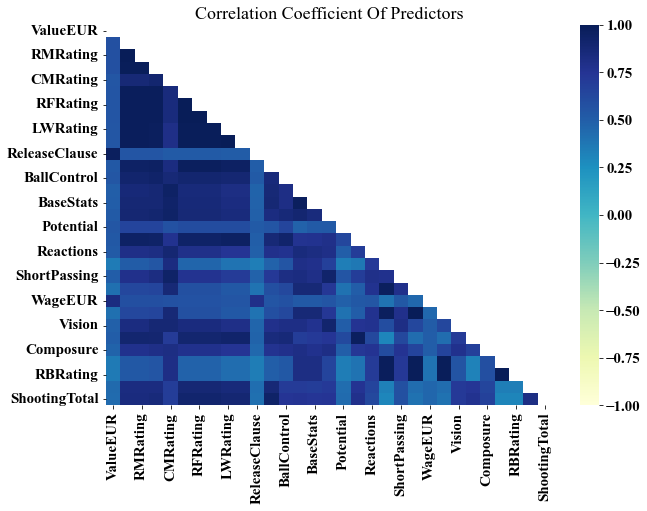

In [65]:
#selecting the features
cm1 = g3_x1.copy()

# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(cm1.corr(), dtype=bool))
# generate heatmap
sb.heatmap(cm1.corr(), mask=mask, vmin=-1, vmax=1 ,cmap="YlGnBu", center = 0)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

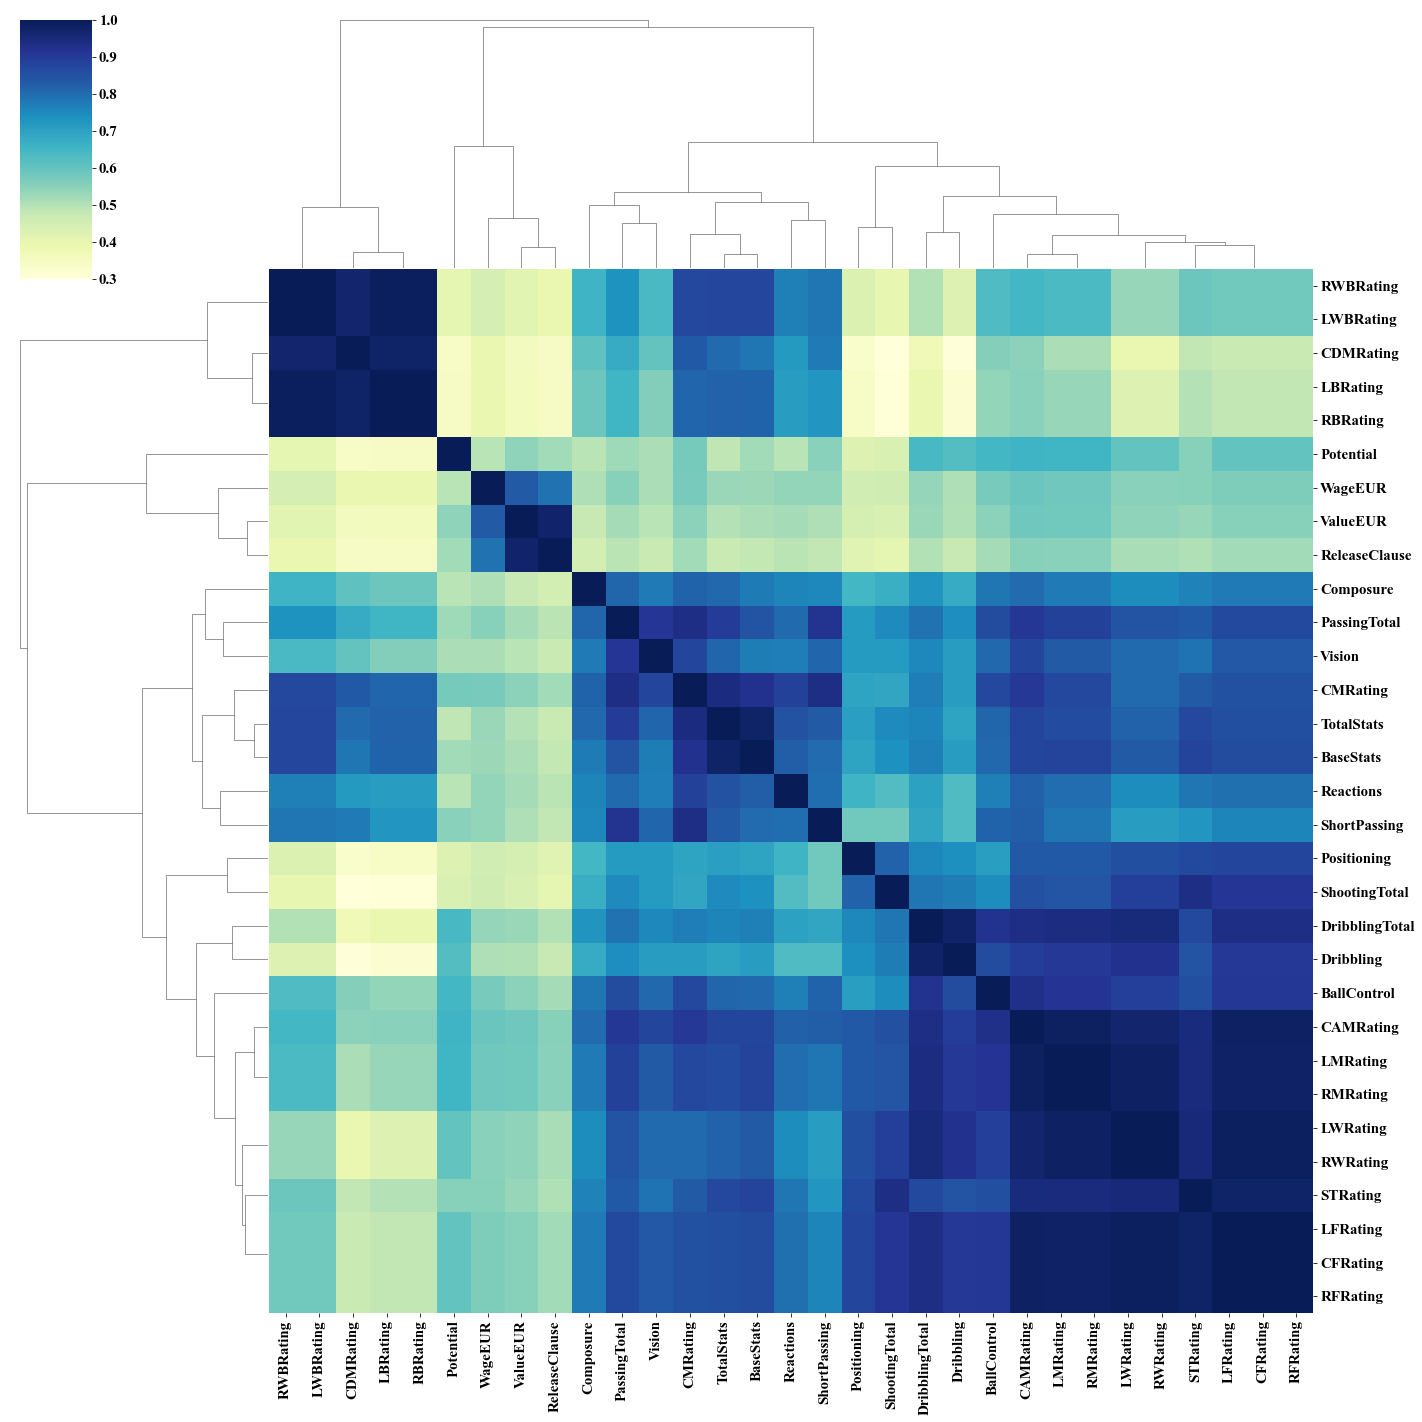

In [66]:
#plotting a cluster map
sb.clustermap(cm1.corr(), figsize=(20,20), cmap = "YlGnBu")

In [67]:
#checking the vif scores for our data
y = compute_vif(cm1)
cm1.drop(columns = ['intercept'], inplace = True)
y

,Variable,VIF
0,ValueEUR,22.253018
1,LMRating,inf
2,RMRating,inf
3,CAMRating,153.713515
4,CMRating,110.620663
5,CFRating,inf
6,RFRating,inf
7,LFRating,inf
8,LWRating,inf
9,RWRating,inf


In [68]:
#describing our features
cm1.describe()

,ValueEUR,LMRating,RMRating,CAMRating,CMRating,CFRating,RFRating,LFRating,LWRating,RWRating,...,RWBRating,WageEUR,LWBRating,Vision,Dribbling,Composure,LBRating,RBRating,Positioning,ShootingTotal
count,7.344000e+03,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,...,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
mean,3.280260e+06,66.050517,66.050517,65.922113,64.578704,63.322712,63.322712,63.322712,63.838508,63.838508,...,61.188181,9486.063453,61.188181,63.240468,66.091912,61.838780,59.675381,59.675381,60.104711,57.526688
std,8.074404e+06,6.587393,6.587393,6.787583,7.317273,7.025015,7.025015,7.025015,6.964810,6.964810,...,7.957397,19870.410448,7.957397,8.703315,8.243527,9.952024,8.498032,8.498032,9.380530,9.483134
min,0.000000e+00,46.000000,46.000000,46.000000,41.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,37.000000,500.000000,37.000000,31.000000,25.000000,34.000000,35.000000,35.000000,23.000000,26.000000
25%,5.500000e+05,62.000000,62.000000,62.000000,60.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,56.000000,1000.000000,56.000000,57.000000,61.000000,55.000000,54.000000,54.000000,55.000000,51.000000
50%,1.100000e+06,66.000000,66.000000,66.000000,65.000000,63.000000,63.000000,63.000000,64.000000,64.000000,...,61.000000,3000.000000,61.000000,63.000000,66.000000,62.000000,60.000000,60.000000,60.000000,58.000000
75%,2.400000e+06,70.000000,70.000000,70.000000,69.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,67.000000,9000.000000,67.000000,69.000000,72.000000,69.000000,66.000000,66.000000,66.000000,64.000000
max,1.255000e+08,91.000000,91.000000,91.000000,91.000000,87.000000,87.000000,87.000000,88.000000,88.000000,...,88.000000,350000.000000,88.000000,94.000000,92.000000,94.000000,88.000000,88.000000,96.000000,87.000000


#### Rescaling

In [69]:
# rescaling our features using minmax scaler 
c_norm = pd.DataFrame(scaler.fit_transform(cm1.values))
c_norm.columns = cm1.columns

#adding index 
i = pd.DataFrame(cm1.index)
c_norm1 = pd.concat([c_norm, i], axis = 1)
c_norm2 = c_norm1.set_index('index')

#describing our rescaled dataframe 
c_norm2.describe()

,ValueEUR,LMRating,RMRating,CAMRating,CMRating,CFRating,RFRating,LFRating,LWRating,RWRating,...,RWBRating,WageEUR,LWBRating,Vision,Dribbling,Composure,LBRating,RBRating,Positioning,ShootingTotal
count,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,...,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03
mean,6.932847e-17,-7.106093e-15,-7.106093e-15,9.866109e-15,-7.653645e-16,-3.151437e-15,-3.151437e-15,-3.151437e-15,5.368497e-16,5.368497e-16,...,1.238419e-15,-2.498153e-16,1.238419e-15,-2.639471e-15,1.569792e-16,2.087110e-16,2.056694e-15,2.056694e-15,-3.741742e-15,1.860228e-14
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,...,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-4.062818e-01,-3.043979e+00,-3.043979e+00,-2.935282e+00,-3.222554e+00,-3.035462e+00,-3.035462e+00,-3.035462e+00,-3.135763e+00,-3.135763e+00,...,-3.039917e+00,-4.522642e-01,-3.039917e+00,-3.704642e+00,-4.985088e+00,-2.797489e+00,-2.903856e+00,-2.903856e+00,-3.955772e+00,-3.324727e+00
25%,-3.381607e-01,-6.149312e-01,-6.149312e-01,-5.778758e-01,-6.257817e-01,-6.153733e-01,-6.153733e-01,-6.153733e-01,-6.947551e-01,-6.947551e-01,...,-6.520392e-01,-4.270994e-01,-6.520392e-01,-7.170708e-01,-6.177281e-01,-6.872216e-01,-6.678920e-01,-6.678920e-01,-5.442186e-01,-6.882886e-01
50%,-2.700396e-01,-7.669327e-03,-7.669327e-03,1.147566e-02,5.757950e-02,-4.594074e-02,-4.594074e-02,-4.594074e-02,2.318848e-02,2.318848e-02,...,-2.365015e-02,-3.264404e-01,-2.365015e-02,-2.763140e-02,-1.115033e-02,1.620083e-02,3.820188e-02,3.820188e-02,-1.116338e-02,4.991428e-02
75%,-1.090260e-01,5.995925e-01,5.995925e-01,6.008272e-01,6.042684e-01,6.658500e-01,6.658500e-01,6.658500e-01,5.975433e-01,5.975433e-01,...,7.304166e-01,-2.446334e-02,7.304166e-01,6.618080e-01,7.167430e-01,7.196232e-01,7.442958e-01,7.442958e-01,6.285029e-01,6.826596e-01
max,1.513772e+01,3.787717e+00,3.787717e+00,3.694923e+00,3.611058e+00,3.370655e+00,3.370655e+00,3.370655e+00,3.469318e+00,3.469318e+00,...,3.369650e+00,1.713790e+01,3.369650e+00,3.534472e+00,3.143054e+00,3.231846e+00,3.333307e+00,3.333307e+00,3.826834e+00,3.108183e+00


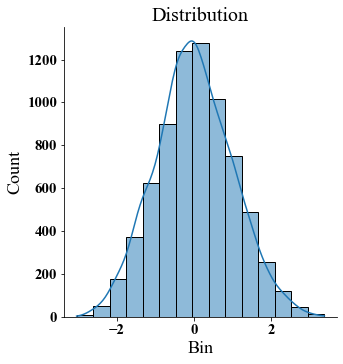

In [70]:
#checking the distribution of a random variable
sb.displot(c_norm2['LFRating'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

#### Standardization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(c_norm2.values)
c_norm3 = pd.DataFrame(scaler.transform(c_norm2.values))
c_norm3.columns = cm1.columns

#adding index 
i = pd.DataFrame(cm1.index)
c_normm = pd.concat([c_norm3, i], axis = 1)
c_norm4 = c_normm.set_index('index')
c_norm4.describe()

,ValueEUR,LMRating,RMRating,CAMRating,CMRating,CFRating,RFRating,LFRating,LWRating,RWRating,...,RWBRating,WageEUR,LWBRating,Vision,Dribbling,Composure,LBRating,RBRating,Positioning,ShootingTotal
count,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,...,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03,7.344000e+03
mean,6.932847e-17,-6.873889e-15,-6.873889e-15,9.834181e-15,8.434913e-16,-3.205013e-15,-3.205013e-15,-3.205013e-15,4.772266e-16,4.772266e-16,...,1.556066e-15,-1.801542e-16,1.556066e-15,-2.639471e-15,1.579468e-16,2.747137e-16,2.056694e-15,2.056694e-15,-3.474345e-15,1.802903e-14
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,...,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-4.062818e-01,-3.043979e+00,-3.043979e+00,-2.935282e+00,-3.222554e+00,-3.035462e+00,-3.035462e+00,-3.035462e+00,-3.135763e+00,-3.135763e+00,...,-3.039917e+00,-4.522642e-01,-3.039917e+00,-3.704642e+00,-4.985088e+00,-2.797489e+00,-2.903856e+00,-2.903856e+00,-3.955772e+00,-3.324727e+00
25%,-3.381607e-01,-6.149312e-01,-6.149312e-01,-5.778758e-01,-6.257817e-01,-6.153733e-01,-6.153733e-01,-6.153733e-01,-6.947551e-01,-6.947551e-01,...,-6.520392e-01,-4.270994e-01,-6.520392e-01,-7.170708e-01,-6.177281e-01,-6.872216e-01,-6.678920e-01,-6.678920e-01,-5.442186e-01,-6.882886e-01
50%,-2.700396e-01,-7.669327e-03,-7.669327e-03,1.147566e-02,5.757950e-02,-4.594074e-02,-4.594074e-02,-4.594074e-02,2.318848e-02,2.318848e-02,...,-2.365015e-02,-3.264404e-01,-2.365015e-02,-2.763140e-02,-1.115033e-02,1.620083e-02,3.820188e-02,3.820188e-02,-1.116338e-02,4.991428e-02
75%,-1.090260e-01,5.995925e-01,5.995925e-01,6.008272e-01,6.042684e-01,6.658500e-01,6.658500e-01,6.658500e-01,5.975433e-01,5.975433e-01,...,7.304166e-01,-2.446334e-02,7.304166e-01,6.618080e-01,7.167430e-01,7.196232e-01,7.442958e-01,7.442958e-01,6.285029e-01,6.826596e-01
max,1.513772e+01,3.787717e+00,3.787717e+00,3.694923e+00,3.611058e+00,3.370655e+00,3.370655e+00,3.370655e+00,3.469318e+00,3.469318e+00,...,3.369650e+00,1.713790e+01,3.369650e+00,3.534472e+00,3.143054e+00,3.231846e+00,3.333307e+00,3.333307e+00,3.826834e+00,3.108183e+00


### Group 4

#### Mutual Information

In [72]:
#choosing the label and predictor
g4_x = g4.drop(columns = ['Overall', 'BestPosition'])
g4_y = g4[['Overall']]
#using mutual information score to asses importance of each column 
discrete_features = g4_x.dtypes == int
mi_scores = make_mi_scores(g4_x, g4_y, discrete_features)
mi_scores.head(60)

STRating            1.991302
ValueEUR            1.649527
RFRating            1.611153
CFRating            1.608926
LFRating            1.608172
CAMRating           1.361841
LMRating            1.171101
RWRating            1.167489
RMRating            1.165058
LWRating            1.161964
ShootingTotal       1.076592
Potential           1.025430
BallControl         0.939890
ReleaseClause       0.933566
CMRating            0.927472
Positioning         0.919332
TotalStats          0.873644
BaseStats           0.821001
Finishing           0.805290
Reactions           0.798326
DribblingTotal      0.689051
WageEUR             0.649434
Composure           0.647007
ShortPassing        0.643070
ShotPower           0.624179
LongShots           0.617941
Dribbling           0.617227
PassingTotal        0.554542
CDMRating           0.526315
Volleys             0.524959
LWBRating           0.460815
RWBRating           0.453624
Vision              0.440798
LBRating            0.432062
RBRating      

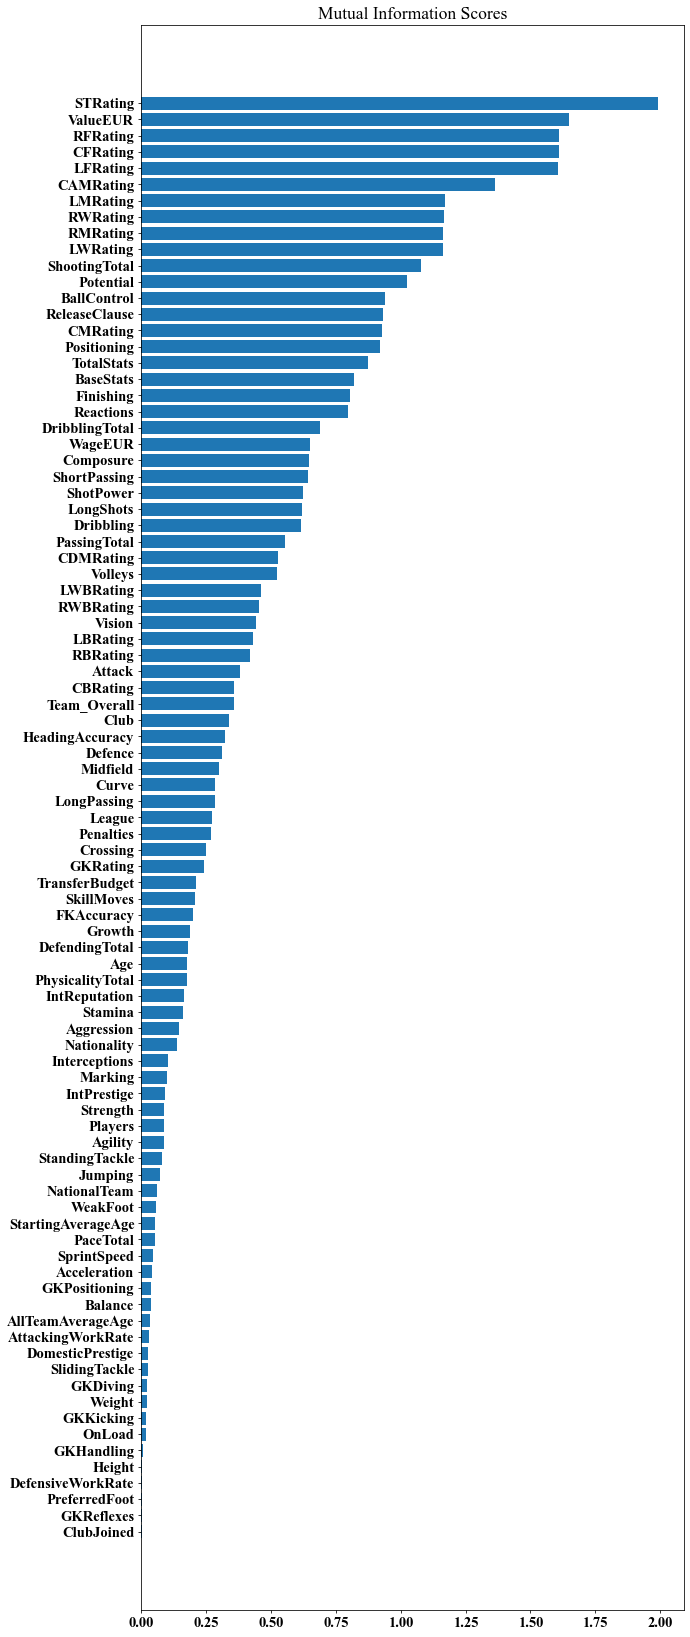

In [73]:
#plotting the mi scores
plt.figure(dpi=70, figsize=(10, 30))
plot_mi_scores(mi_scores)

In [74]:
#selecting features with mi scores more than 0.5
m1_scores = pd.DataFrame(mi_scores).reset_index()
m2_scores = m1_scores.rename(columns = {'index' : 'feature'})
m3_score = m2_scores[m2_scores['MI Scores'] >= 0.5]
#selecting the features
g4_x1 = g4_x[m3_score.feature.unique()]
#checking on the correlation of our variables
g4_x1.corr()

,STRating,ValueEUR,RFRating,CFRating,LFRating,CAMRating,LMRating,RWRating,RMRating,LWRating,...,DribblingTotal,WageEUR,Composure,ShortPassing,ShotPower,LongShots,Dribbling,PassingTotal,CDMRating,Volleys
STRating,1.000000,0.557350,0.958104,0.958104,0.958104,0.925937,0.892748,0.889741,0.892748,0.889741,...,0.814146,0.590550,0.802010,0.816131,0.836888,0.804692,0.793288,0.740333,0.727683,0.793630
ValueEUR,0.557350,1.000000,0.545884,0.545884,0.545884,0.548618,0.536451,0.528344,0.536451,0.528344,...,0.489022,0.838687,0.441346,0.453553,0.402025,0.429502,0.468193,0.438703,0.403832,0.408992
RFRating,0.958104,0.545884,1.000000,1.000000,1.000000,0.989209,0.971021,0.973303,0.971021,0.973303,...,0.918815,0.585791,0.824537,0.880329,0.794732,0.822346,0.890085,0.858120,0.784080,0.773745
CFRating,0.958104,0.545884,1.000000,1.000000,1.000000,0.989209,0.971021,0.973303,0.971021,0.973303,...,0.918815,0.585791,0.824537,0.880329,0.794732,0.822346,0.890085,0.858120,0.784080,0.773745
LFRating,0.958104,0.545884,1.000000,1.000000,1.000000,0.989209,0.971021,0.973303,0.971021,0.973303,...,0.918815,0.585791,0.824537,0.880329,0.794732,0.822346,0.890085,0.858120,0.784080,0.773745
CAMRating,0.925937,0.548618,0.989209,0.989209,0.989209,1.000000,0.983400,0.981797,0.983400,0.981797,...,0.930604,0.586608,0.812653,0.906400,0.752940,0.809254,0.898699,0.900905,0.803502,0.747436
LMRating,0.892748,0.536451,0.971021,0.971021,0.971021,0.983400,1.000000,0.993197,1.000000,0.993197,...,0.938104,0.571429,0.779135,0.878563,0.720411,0.765895,0.907238,0.913607,0.802631,0.704813
RWRating,0.889741,0.528344,0.973303,0.973303,0.973303,0.981797,0.993197,1.000000,0.993197,1.000000,...,0.954989,0.564196,0.774849,0.866394,0.714486,0.779160,0.922290,0.900092,0.776298,0.705062
RMRating,0.892748,0.536451,0.971021,0.971021,0.971021,0.983400,1.000000,0.993197,1.000000,0.993197,...,0.938104,0.571429,0.779135,0.878563,0.720411,0.765895,0.907238,0.913607,0.802631,0.704813
LWRating,0.889741,0.528344,0.973303,0.973303,0.973303,0.981797,0.993197,1.000000,0.993197,1.000000,...,0.954989,0.564196,0.774849,0.866394,0.714486,0.779160,0.922290,0.900092,0.776298,0.705062


#### Multicollinearity

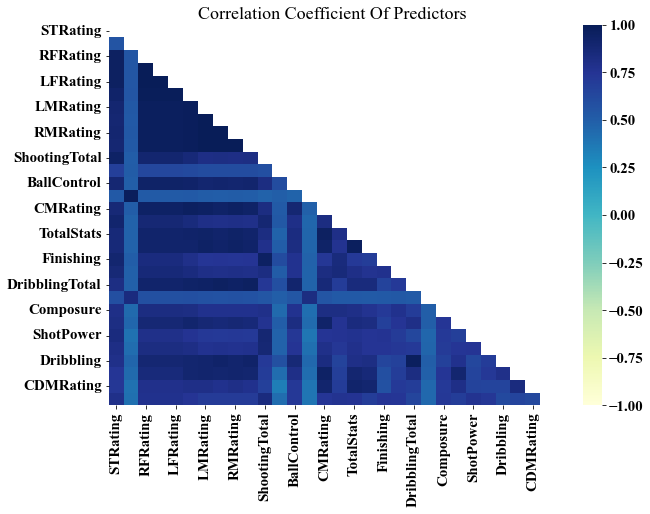

In [75]:
#selecting the features
at1 = g4_x1.copy()

# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(at1.corr(), dtype=bool))
# generate heatmap
sb.heatmap(at1.corr(), mask=mask, vmin=-1, vmax=1 ,cmap="YlGnBu", center = 0)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

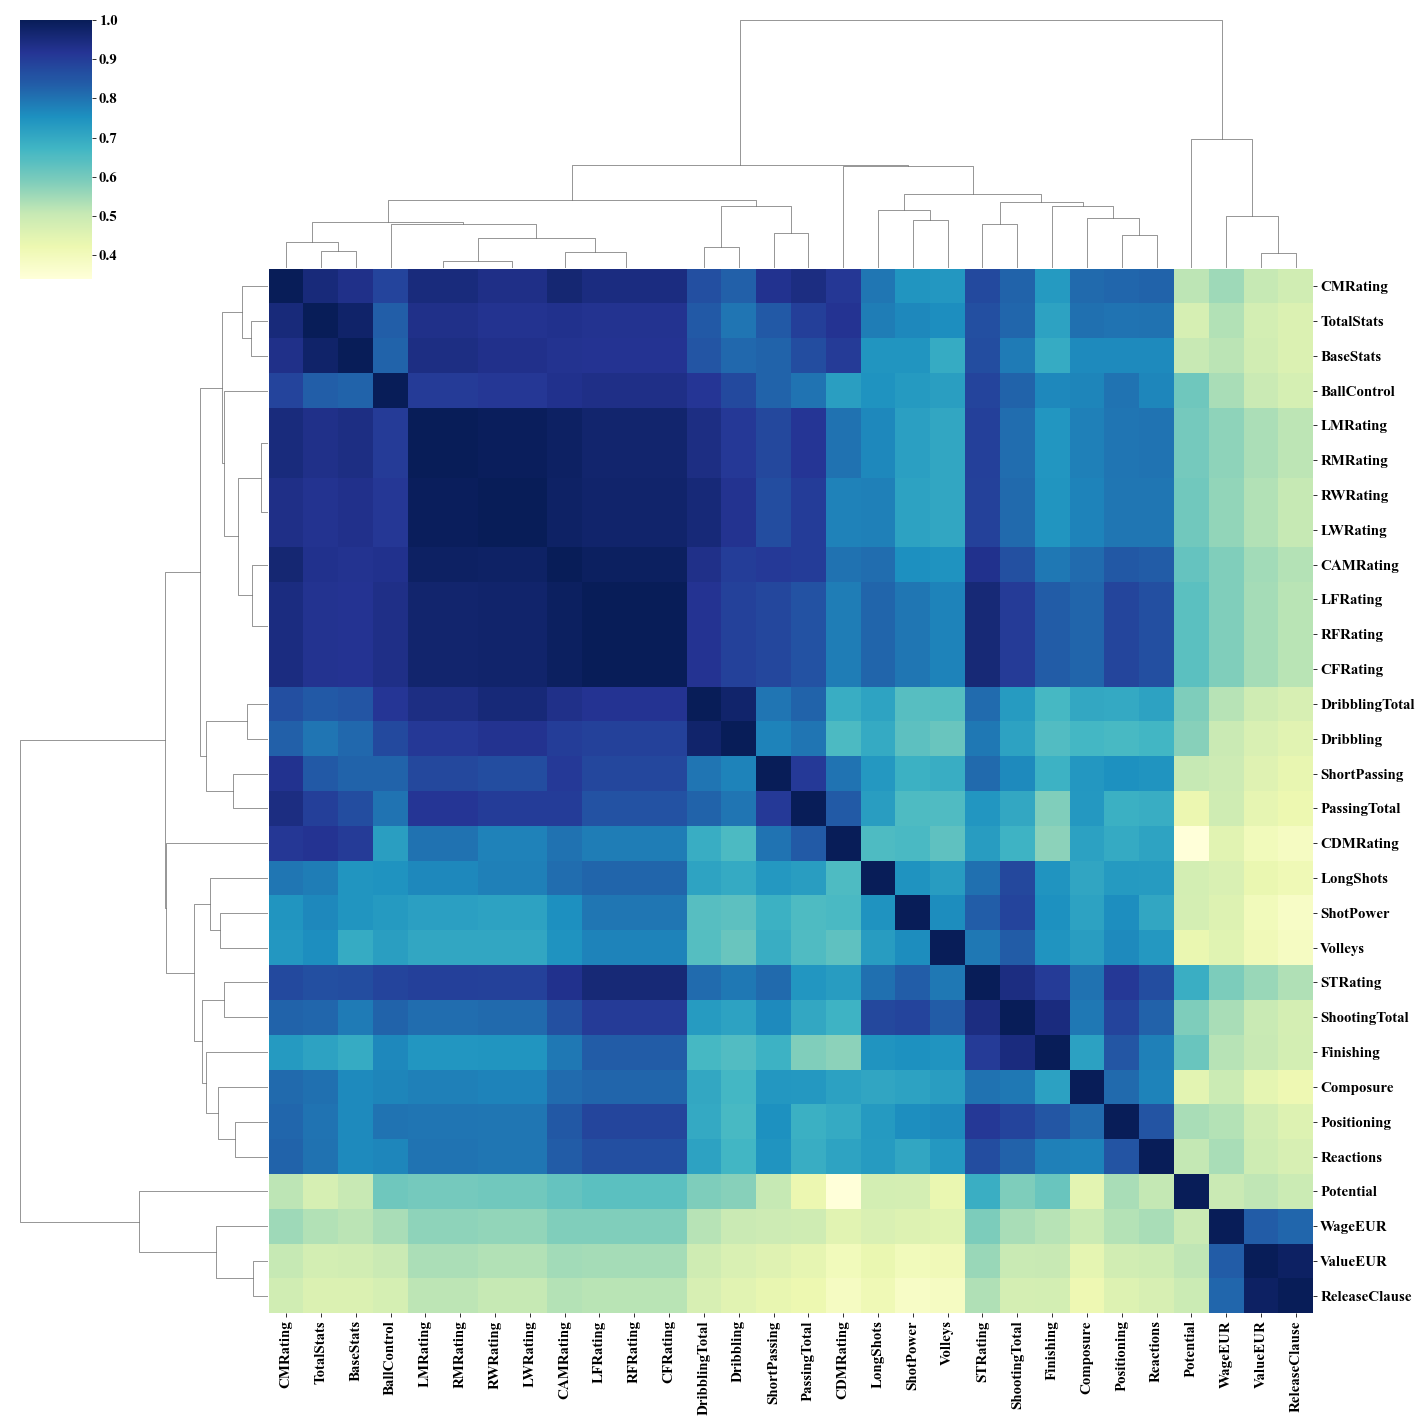

In [76]:
#plotting a cluster map
sb.clustermap(at1.corr(), figsize=(20,20), cmap = "YlGnBu")

In [77]:
#checking the vif scores for our data
y = compute_vif(at1)
at1.drop(columns = ['intercept'], inplace = True)
y

,Variable,VIF
0,STRating,59.290039
1,ValueEUR,35.190616
2,RFRating,inf
3,CFRating,inf
4,LFRating,inf
5,CAMRating,161.378512
6,LMRating,inf
7,RWRating,inf
8,RMRating,inf
9,LWRating,inf


In [78]:
#describing our features
at1.describe()

,STRating,ValueEUR,RFRating,CFRating,LFRating,CAMRating,LMRating,RWRating,RMRating,LWRating,...,DribblingTotal,WageEUR,Composure,ShortPassing,ShotPower,LongShots,Dribbling,PassingTotal,CDMRating,Volleys
count,3235.000000,3.235000e+03,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,...,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000,3235.000000
mean,66.834312,3.201683e+06,64.582380,64.582380,64.582380,64.617002,64.139104,63.581762,64.139104,63.581762,...,65.358887,10516.120556,61.109119,60.102628,67.442349,60.790417,64.941267,54.610510,48.595672,59.063988
std,6.449346,9.401134e+06,6.828195,6.828195,6.828195,6.973678,7.021863,6.971297,7.021863,6.971297,...,7.391899,24643.184933,9.789316,8.786408,8.486447,8.549574,8.142303,9.152444,7.491804,10.393194
min,47.000000,0.000000e+00,45.000000,45.000000,45.000000,44.000000,44.000000,43.000000,44.000000,43.000000,...,43.000000,500.000000,32.000000,28.000000,38.000000,30.000000,39.000000,30.000000,29.000000,27.000000
25%,63.000000,5.500000e+05,60.000000,60.000000,60.000000,60.000000,59.000000,59.000000,59.000000,59.000000,...,61.000000,1000.000000,54.000000,55.000000,62.000000,55.000000,60.000000,48.000000,43.000000,52.000000
50%,67.000000,1.100000e+06,64.000000,64.000000,64.000000,64.000000,64.000000,63.000000,64.000000,63.000000,...,65.000000,3000.000000,61.000000,60.000000,68.000000,61.000000,65.000000,54.000000,48.000000,59.000000
75%,71.000000,2.100000e+06,69.000000,69.000000,69.000000,69.000000,68.000000,68.000000,68.000000,68.000000,...,70.000000,10000.000000,68.000000,66.000000,73.000000,66.000000,70.000000,61.000000,53.000000,66.000000
max,92.000000,1.940000e+08,93.000000,93.000000,93.000000,93.000000,93.000000,92.000000,93.000000,92.000000,...,95.000000,350000.000000,96.000000,91.000000,94.000000,94.000000,96.000000,91.000000,77.000000,90.000000


#### Rescaling

In [79]:
# rescaling our features using minmax scaler 
a_norm = pd.DataFrame(scaler.fit_transform(at1.values))
a_norm.columns = at1.columns

#adding index 
i = pd.DataFrame(at1.index)
a_norm1 = pd.concat([a_norm, i], axis = 1)
a_norm2 = a_norm1.set_index('index')

#describing our rescaled dataframe 
a_norm2.describe()

,STRating,ValueEUR,RFRating,CFRating,LFRating,CAMRating,LMRating,RWRating,RMRating,LWRating,...,DribblingTotal,WageEUR,Composure,ShortPassing,ShotPower,LongShots,Dribbling,PassingTotal,CDMRating,Volleys
count,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,...,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03
mean,-1.392505e-14,-9.653621e-16,-2.470564e-15,-2.470564e-15,-2.470564e-15,1.258550e-15,-4.876058e-16,-9.052007e-16,-4.876058e-16,-9.052007e-16,...,-9.060244e-17,-5.450903e-16,-2.240351e-15,5.713444e-16,7.670766e-15,-1.753624e-14,-1.285113e-15,3.833444e-16,-1.686441e-15,1.709984e-15
std,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,...,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00
min,-3.075875e+00,-3.406162e-01,-2.868314e+00,-2.868314e+00,-2.868314e+00,-2.956860e+00,-2.868501e+00,-2.952814e+00,-2.868501e+00,-2.952814e+00,...,-3.025250e+00,-4.065087e-01,-2.974020e+00,-3.654234e+00,-3.469874e+00,-3.601955e+00,-3.186479e+00,-2.689371e+00,-2.616019e+00,-3.085572e+00
25%,-5.946192e-01,-2.821035e-01,-6.712006e-01,-6.712006e-01,-6.712006e-01,-6.621636e-01,-7.319850e-01,-6.573339e-01,-7.319850e-01,-6.573339e-01,...,-5.897755e-01,-3.862160e-01,-7.263243e-01,-5.808308e-01,-6.413980e-01,-6.773803e-01,-6.069574e-01,-7.223788e-01,-7.470213e-01,-6.797795e-01
50%,2.569461e-02,-2.235909e-01,-8.530370e-02,-8.530370e-02,-8.530370e-02,-8.848946e-02,-1.981313e-02,-8.346394e-02,-1.981313e-02,-8.346394e-02,...,-4.855892e-02,-3.050451e-01,-1.114847e-02,-1.168206e-02,6.572089e-02,2.451761e-02,7.214383e-03,-6.671490e-02,-7.952216e-02,-6.157638e-03
75%,6.460084e-01,-1.172043e-01,6.470675e-01,6.470675e-01,6.470675e-01,6.286032e-01,5.499244e-01,6.338736e-01,5.499244e-01,6.338736e-01,...,6.279618e-01,-2.094698e-02,7.040274e-01,6.712964e-01,6.549867e-01,6.094325e-01,6.213862e-01,6.982263e-01,5.879770e-01,6.674642e-01
max,3.902656e+00,2.029838e+01,4.162449e+00,4.162449e+00,4.162449e+00,4.070648e+00,4.110784e+00,4.077094e+00,4.110784e+00,4.077094e+00,...,4.010565e+00,1.377810e+01,3.564731e+00,3.517040e+00,3.129903e+00,3.884956e+00,3.815079e+00,3.976546e+00,3.791973e+00,2.977025e+00


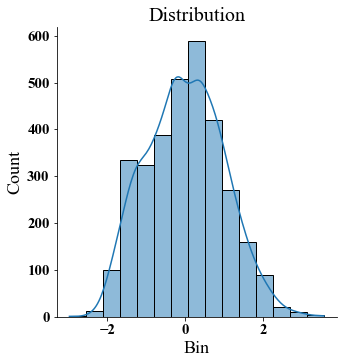

In [80]:
#checking the distribution of a random variable
sb.displot(a_norm2['Composure'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

#### Standardization

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(a_norm2.values)
a_norm3 = pd.DataFrame(scaler.transform(a_norm2.values))
a_norm3.columns = at1.columns

#adding index 
i = pd.DataFrame(at1.index)
a_normm = pd.concat([a_norm3, i], axis = 1)
a_norm4 = a_normm.set_index('index')
a_norm4.describe()

,STRating,ValueEUR,RFRating,CFRating,LFRating,CAMRating,LMRating,RWRating,RMRating,LWRating,...,DribblingTotal,WageEUR,Composure,ShortPassing,ShotPower,LongShots,Dribbling,PassingTotal,CDMRating,Volleys
count,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,...,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03,3.235000e+03
mean,-1.466057e-14,-9.763442e-16,-2.336307e-15,-2.336307e-15,-2.336307e-15,1.465288e-15,-4.656416e-16,-9.052007e-16,-4.656416e-16,-9.052007e-16,...,-9.060244e-17,-5.226113e-16,-2.249960e-15,4.516394e-16,7.538534e-15,-1.591089e-14,2.689725e-15,2.930165e-16,-1.576826e-15,1.842044e-15
std,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,...,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00
min,-3.075875e+00,-3.406162e-01,-2.868314e+00,-2.868314e+00,-2.868314e+00,-2.956860e+00,-2.868501e+00,-2.952814e+00,-2.868501e+00,-2.952814e+00,...,-3.025250e+00,-4.065087e-01,-2.974020e+00,-3.654234e+00,-3.469874e+00,-3.601955e+00,-3.186479e+00,-2.689371e+00,-2.616019e+00,-3.085572e+00
25%,-5.946192e-01,-2.821035e-01,-6.712006e-01,-6.712006e-01,-6.712006e-01,-6.621636e-01,-7.319850e-01,-6.573339e-01,-7.319850e-01,-6.573339e-01,...,-5.897755e-01,-3.862160e-01,-7.263243e-01,-5.808308e-01,-6.413980e-01,-6.773803e-01,-6.069574e-01,-7.223788e-01,-7.470213e-01,-6.797795e-01
50%,2.569461e-02,-2.235909e-01,-8.530370e-02,-8.530370e-02,-8.530370e-02,-8.848946e-02,-1.981313e-02,-8.346394e-02,-1.981313e-02,-8.346394e-02,...,-4.855892e-02,-3.050451e-01,-1.114847e-02,-1.168206e-02,6.572089e-02,2.451761e-02,7.214383e-03,-6.671490e-02,-7.952216e-02,-6.157638e-03
75%,6.460084e-01,-1.172043e-01,6.470675e-01,6.470675e-01,6.470675e-01,6.286032e-01,5.499244e-01,6.338736e-01,5.499244e-01,6.338736e-01,...,6.279618e-01,-2.094698e-02,7.040274e-01,6.712964e-01,6.549867e-01,6.094325e-01,6.213862e-01,6.982263e-01,5.879770e-01,6.674642e-01
max,3.902656e+00,2.029838e+01,4.162449e+00,4.162449e+00,4.162449e+00,4.070648e+00,4.110784e+00,4.077094e+00,4.110784e+00,4.077094e+00,...,4.010565e+00,1.377810e+01,3.564731e+00,3.517040e+00,3.129903e+00,3.884956e+00,3.815079e+00,3.976546e+00,3.791973e+00,2.977025e+00


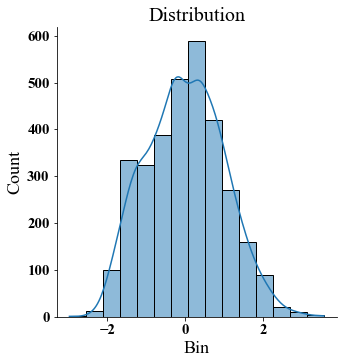

In [82]:
#checking the distribution of a random variable
sb.displot(a_norm2['Composure'], bins = 15,kde = True)
plt.title('Distribution', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Bin', fontsize = 18)
plt.show()

# 8. Modelling

Our data has been divided into 4 groups so as to maximize our algorithms learning from the models effectively we will train these groups independently. 

## a. Baseline models

The first step towards modelling will be creating our baseline modles these are models that will be used as refernce for the other models that we will create. Naturally the baseline models that we create will be simple linear regression models that can give us a glimpse of what we expect. 

The first machine learning algorithm that we will employ will be linear regression it uses the equation **y = mx + c** to predict y where m is the coeficient and c is the y intercept.

#### Group 1 (Goalkeepers)

In [83]:
#getting our label and predictor 
g1_y1 = g1_y.values.reshape(-1, 1)
#selecting one predictors
gk = g_norm4.values

#splitting our data into 80% train and 20% test
from sklearn.model_selection import train_test_split
r_train, r_test, o_train, o_test = train_test_split(gk, g1_y1, test_size = 0.2, random_state = 0)

#training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr, parameters, cv=5)
grid.fit(r_train, o_train)

#predicting
o_pred = grid.predict(r_test).round(2)

##### Model evaluation

In [84]:
#we will create a comparison frame
frame = pd.DataFrame({'Actual': o_test.flatten(), 'Predicted': o_pred.flatten()})
frame.describe()

,Actual,Predicted
count,423.000000,423.000000
mean,64.654846,64.670709
std,7.547575,7.543651
min,48.000000,48.130000
25%,60.000000,59.895000
50%,64.000000,64.230000
75%,70.000000,69.665000
max,90.000000,90.230000


In [85]:
from sklearn import metrics
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o_test, o_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o_test, o_pred).round(4))

Root Mean Squared Error: 0.228
The coefficient of determination is:  0.9991


We have achieved an RMSE score of 0.228 and achieved an R-Squared of 0.9991 for the first model we will exect the rest of the models to perform better.

#### Group 2 (Defenders)

In [86]:
#getting our label and predictor 
g2_y1 = g2_y.values.reshape(-1, 1)
#selecting one predictors
df = d_norm4.values

#splitting our data into 80% train and 20% test
r1_train, r1_test, o1_train, o1_test = train_test_split(df, g2_y1, test_size = 0.2, random_state = 0)

#training
lr = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr, parameters, cv=5)
grid.fit(r1_train, o1_train)

#predicting
o1_pred = pd.DataFrame(grid.predict(r1_test).round(5))
o1_test1 = pd.DataFrame(o1_test)

##### Model evaluation

In [87]:
#we will create a comparison frame
o1_pred.columns = ['predicted']
o1_test1.columns = ['true']
frame = pd.concat([o1_test1, o1_pred])
frame.describe()

,true,predicted
count,1293.000000,1293.000000
mean,65.826759,65.774819
std,6.452085,6.361842
min,48.000000,47.561240
25%,62.000000,61.635160
50%,66.000000,65.391290
75%,70.000000,69.829070
max,86.000000,86.836820


In [88]:
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o1_test, o1_pred)).round(5))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o1_test, o1_pred).round(5))

Root Mean Squared Error: 1.16256
The coefficient of determination is:  0.96751


The model for the defenders has achieved an RMSE score of 1.1626 and an R-squared of 0,9675 these are the scores for the succeeding models to beat.

#### Group 3 (Midfielders)

In [89]:
#getting our label and predictor 
g3_y1 = g3_y.values.reshape(-1, 1)
#selecting one predictors
cm = c_norm4.values

#splitting our data into 80% train and 20% test
r2_train, r2_test, o2_train, o2_test = train_test_split(cm, g3_y1, test_size = 0.2, random_state = 0)

#training
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr, parameters, cv=5)
grid.fit(r2_train, o2_train)

#predicting
o2_pred = grid.predict(r2_test).round(5)

##### Model evaluation

In [90]:
#we will create a comparison frame
frame = pd.DataFrame({'Actual': o2_test.flatten(), 'Predicted': o2_pred.flatten()})
frame.describe()

,Actual,Predicted
count,1469.000000,1469.000000
mean,66.085773,66.115418
std,6.877440,6.699985
min,48.000000,48.236870
25%,62.000000,61.732550
50%,66.000000,65.736650
75%,71.000000,70.492010
max,87.000000,89.030780


In [91]:
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o2_test, o2_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o2_test, o2_pred).round(4))

Root Mean Squared Error: 1.7161
The coefficient of determination is:  0.9377


The baseline model for midfialders has achieved an RMSE score of 1.7214 and an R-squared of 0.9373 these are the scores for the succeeding models to beat.

#### Group 4 (Attackers)

In [92]:
#getting our label and predictor 
g4_y1 = g4_y.values.reshape(-1, 1)
#selecting one predictors
att = a_norm4.values

#splitting our data into 80% train and 20% test
r3_train, r3_test, o3_train, o3_test = train_test_split(att, g4_y1, test_size = 0.2, random_state = 0)

#training
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lr, parameters, cv=5)
grid.fit(r3_train, o3_train)

#predicting
o3_pred = grid.predict(r3_test).round(5)

##### Model Evaluation

In [93]:
#we will create a comparison frame
frame = pd.DataFrame({'Actual': o3_test.flatten(), 'Predicted': o3_pred.flatten()})
frame.describe()

,Actual,Predicted
count,647.000000,647.000000
mean,65.765070,65.773296
std,6.867644,6.761422
min,48.000000,47.458570
25%,61.500000,61.527135
50%,66.000000,65.884460
75%,70.000000,70.194470
max,88.000000,88.091360


In [94]:
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o3_test, o3_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o3_test, o3_pred).round(4))

Root Mean Squared Error: 0.8916
The coefficient of determination is:  0.9831


The baseline model for the attackers has achieved an RMSE score of 0.8923 and an R-squared of 0.9831 these are the scores for the succeeding models to beat.

## b. Ridge Regression

* Overfitting, which leads to excessively complex models which leads to noise is a challenge in some machine learning algorithms such as linear regression and polynomial regression, however we can avoid this problem by applying regularization to multi linear regression models.

* Regularization aims to alleviate this phenomenon by constraining bias hence promoting simple solutions regularization is done by adding a penalty a penalty parameter that is equivalent to the square of the magnitude of the coeffiicients as shown.
> **Loss function = OLS + alpha * sum (squared coefficients)**

> Where alpha is the parameter we need to select 

* A low alpha value will lead to overfitting while a high alpha value will lead to underfitting.

* Ridge regression implements the L2 regularization by addng a penalty equal to the sum of the absolute value of the coefficients.

#### Group 1 (Goalkeepers)

In [95]:
#splitting the data 
r_train, r_test, o_train, o_test = train_test_split(gk, g1_y1, test_size = 0.2, random_state = 0)
#importing modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

From our data the maximum value available in the data is 17.7 while the minimum value that is in our data is -3.8 for our logspace we are going to set this as our maximum and minimum values and for it to return 10 values. 

In [96]:
#instantiate
ridge = Ridge()
search  = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-4, 18, 10)}, scoring = 'neg_mean_squared_error', refit = True, cv = 10)
search.fit(r_train, o_train)
#searching for the best alpha value
print ('Best alpha value: ', search.best_params_)

#searching for the best RMSE value 
print ('Best RMSE score of the data: ', abs(search.best_score_))
#we can confirm the above information based on the values given 
o_pred = search.predict(r_test)
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o_test, o_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o_test, o_pred).round(4))

Best alpha value:  {'alpha': 0.02782559402207126}
Best RMSE score of the data:  0.05823388560574373
Root Mean Squared Error: 0.2281
The coefficient of determination is:  0.9991


#### Group 2 (Defenders)

In [97]:
#splitting our data into 80% train and 20% test
r1_train, r1_test, o1_train, o1_test = train_test_split(df, g2_y1, test_size = 0.2, random_state = 0)

From our data the maximum value in the data is 18.0 while the minimum value that is in our data is -4.3 for our logspace we are going to set this as our maximum and minimum values and for it to return 10 values. 

In [98]:
search  = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-4, 18, 10)}, scoring = 'neg_mean_squared_error', refit = True, cv = 10)
search.fit(r1_train, o1_train)
#searching for the best alpha value
print ('Best alpha value: ', search.best_params_)

#searching for the best RMSE value
print ('Best RMSE score of the data: ', abs(search.best_score_))
#we can confirm the above information based on the values given 
o1_pred = search.predict(r1_test)
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o1_test, o1_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o1_test, o1_pred).round(4))

Best alpha value:  {'alpha': 0.02782559402207126}
Best RMSE score of the data:  1.3535271374914928
Root Mean Squared Error: 1.1626
The coefficient of determination is:  0.9675


#### Group 3 (Midfielders)

In [99]:
#splitting our data into 80% train and 20% test
r2_train, r2_test, o2_train, o2_test = train_test_split(cm, g3_y1, test_size = 0.2, random_state = 0)
cm.max()

17.137900746681236

From our data the maximum value available in the data is 17.1 while the minimum value that is in our data is -4.8 for our logspace we are going to set this as our maximum and minimum values and for it to return 10 values. 

In [100]:
#instantiate
ridge = Ridge()
search  = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-5, 18, 10)}, scoring = 'neg_mean_squared_error', refit = True, cv = 10)
search.fit(r2_train, o2_train)
#searching for the best alpha value
print ('Best alpha value: ', search.best_params_)

#searching for the best RMSE value 
print ('Best RMSE score of the data: ', abs(search.best_score_))
#we can confirm the above information based on the values given 
o2_pred = search.predict(r2_test)
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o2_test, o2_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o2_test, o2_pred).round(4))

Best alpha value:  {'alpha': 1.2915496650148828}
Best RMSE score of the data:  2.782184919891668
Root Mean Squared Error: 1.7169
The coefficient of determination is:  0.9376


#### Group 4 (Attackers)

In [101]:
#splitting our data into 80% train and 20% test
r3_train, r3_test, o3_train, o3_test = train_test_split(att, g4_y1, test_size = 0.2, random_state = 0)

From our data the maximum value available in the data is 20.8 while the minimum value that is in our data is -4.4 for our logspace we are going to set this as our maximum and minimum values and for it to return 10 values

In [102]:
search  = GridSearchCV(estimator = ridge, param_grid = {'alpha' : np.logspace(-5, 21, 10)}, scoring = 'neg_mean_squared_error', refit = True, cv = 10)
search.fit(r3_train, o3_train)
#searching for the best alpha value
print ('Best alpha value: ', search.best_params_)

#searching for the best RMSE value 
print ('Best RMSE score of the data: ', abs(search.best_score_))

#we can confirm the above information based on the values given 
o3_pred = search.predict(r3_test)

#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o3_test, o3_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o3_test, o3_pred).round(4))

Best alpha value:  {'alpha': 0.007742636826811269}
Best RMSE score of the data:  0.9023217066114884
Root Mean Squared Error: 0.8916
The coefficient of determination is:  0.9831


In [103]:
ridge = Ridge(normalize = True,alpha = search.best_params_.get('alpha'))
ridge.fit(r3_train , o3_train)
o3_pred=ridge.predict(r3_test)
#checking on the root mean squared of our data
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(o3_test, o3_pred)).round(4))  

#getting the r squared of the data 
print ('The coefficient of determination is: ', metrics.r2_score(o3_test, o3_pred).round(4))

Root Mean Squared Error: 0.8947
The coefficient of determination is:  0.983
